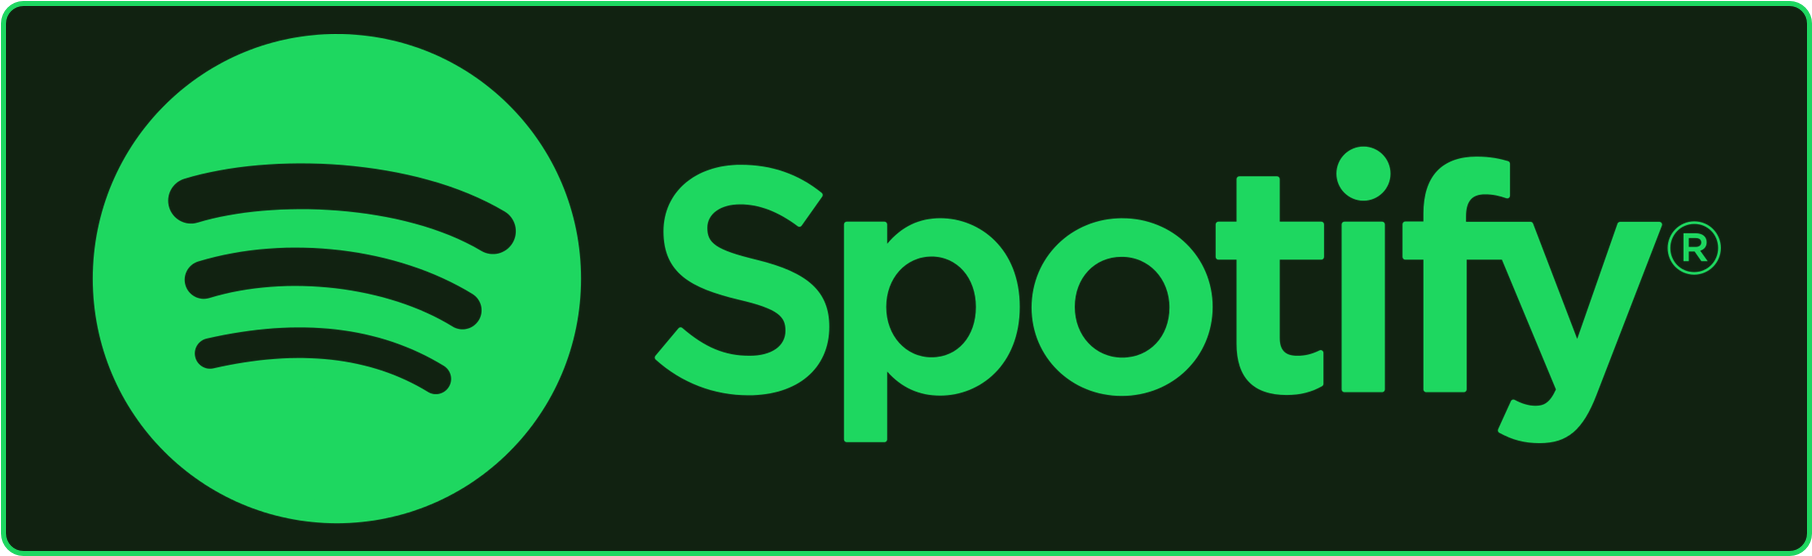

# Part I - (My Favorite Artists: Spotify Exploratory Data Analysis)
## by Harsh Deep Kalita
## Introduction
>One of the apps I have used extensively is the Spotify app for listening to music. In this project, I used the spotipy library, a Python library for the Spotify Web API. It was a really helpful library for extracting data from my desired/favourite artists. I have mentioned all the data-cleaning steps in my project. I performed Univariate, Bivariate, and Multivariate Analysis to investigate my created dataset, this step is known as the Exploratory Data Analysis Part.At the end comes the Explanatory Data Analysis Part where I displayed all my insights in a simplified format so that the viewers can understand the insights easily.  
There are 3 parts to my project:
      1. Preliminary Wrangling
      2. Exploratory Data Analysis
      3. Explanatory Data Analysis

<b>Note</b>: the the exploratory analysis is based on the artists mentioned in my list: 'Ed Sheeran','Shawn Mendes','Calvin Harris','Justin Bieber','Charlie Puth','Martin Garrix',
'The Chainsmokers','Alan Walker','Dua Lipa','Bruno Mars','AC/DC','Kanye West','Guns N' Roses','Green Day','The Weeknd','Eminem','Bob Marley'.






## Preliminary Wrangling


In [92]:
!pip install spotipy
!pip install pywaffle

  Using cached spotipy-2.22.1-py3-none-any.whl (28 kB)
     ------------------------------------ 238.5/238.5 kB 857.9 kB/s eta 0:00:00


In [93]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pywaffle import Waffle

## Gathering Data
Here, I randomly chose 50 songs from each artist mentioned in our list, the songs could be from compilation/album/deluxe/single type album, I used the audio features provided by spotipy to extract features like danceability,energy,loudness, time signatures,etc. and created a dictionary for storing these values and further stored them in a dataframe.

#### Using spotipy 

In [94]:
client_id = 'cd13943a57374cf3ac523583046d6ee0'
client_secret  = '80c618a162c24a4797b0ed9a25dd8f1b'

auth_manager = SpotifyClientCredentials(client_id = client_id , client_secret = client_secret)
obj = spotipy.Spotify(auth_manager = auth_manager)

In [95]:
artist_names = ['Ed Sheeran','Shawn Mendes','Calvin Harris','Justin Bieber','Charlie Puth','Martin Garrix',
'The Chainsmokers','Alan Walker','Dua Lipa','Bruno Mars','AC/DC','Kanye West',"Guns N' Roses",'Green Day','The Weeknd','Eminem','Bob Marley']

features = ['artist_id','artists_name','track_id','song_name','album_name','album_type','release_date',
'popularity','danceability','energy','key','loudness',
'instrumentalness', 'liveness','acousticness','tempo','mode','valence','duration_ms','time_signatures']

In [ ]:
d = []
for i in artist_names :
    artists = obj.search(q = 'artist' + i ,limit = 50)
    for track in artists['tracks']['items'][:50]:

            audio_features = obj.audio_features(track['id'])
            d.append({
                    'artist_id' : track['artists'][0]['id'],
                    'artists_name' :track['artists'][0]['name'],
                    'track_id' : track['id'],
                    'song_name' : track['name'],
                    'album_name' : track['album']['name'],
                    'album_type' : track['album']['album_type'],
                    'release_date' : track['album']['release_date'],
                    'popularity' : track['popularity'],
                    'danceability' : audio_features[0]['danceability'],
                    'energy' : audio_features[0]['energy'],
                    'key' :audio_features[0]['key'],
                    'loudness' : audio_features[0]['loudness'],
                    'instrumentalness' : audio_features[0]['instrumentalness'],
                    'liveness' : audio_features[0]['liveness'],
                    'acousticness' : audio_features[0]['acousticness'],
                    'tempo' : audio_features[0]['tempo'],
                    'mode' : audio_features[0]['mode'],
                    'valence' : audio_features[0]['valence'],
                    'duration_ms' : audio_features[0]['duration_ms'],
                    'time_signatures' : audio_features[0]['time_signature'],
                    })

In [ ]:
df = pd.DataFrame(d , columns = features)

In [ ]:
df.to_csv('df_origina1.csv')

In [96]:
df = pd.read_csv('df_original.csv')

In [97]:
df.drop(columns=['Unnamed: 0'],inplace=True)

#### High level Overview of the Gathered Data before Assessing and Cleaning

In [98]:
print('Number of Columns in this dataset :',df.shape[1],'\nNumber of Columns in this dataset :',df.shape[0],'\n ')
df.info()

Number of Columns in this dataset : 20 
Number of Columns in this dataset : 850 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_id         850 non-null    object 
 1   artists_name      850 non-null    object 
 2   track_id          850 non-null    object 
 3   song_name         850 non-null    object 
 4   album_name        850 non-null    object 
 5   album_type        850 non-null    object 
 6   release_date      850 non-null    object 
 7   popularity        850 non-null    int64  
 8   danceability      850 non-null    float64
 9   energy            850 non-null    float64
 10  key               850 non-null    int64  
 11  loudness          850 non-null    float64
 12  instrumentalness  850 non-null    float64
 13  liveness          850 non-null    float64
 14  acousticness      850 non-null    float64
 15  tempo   

In [99]:
df.describe()

,popularity,danceability,energy,key,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,duration_ms,time_signatures
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,53.107059,0.622358,0.678522,5.368235,-6.286374,0.063178,0.204523,0.182708,122.460178,0.590588,0.506645,225057.590588,3.954118
std,14.426013,0.159199,0.191944,3.568238,2.419939,0.197821,0.189015,0.245399,28.313701,0.492015,0.243340,73936.228762,0.272861
min,1.000000,0.147000,0.026200,0.000000,-19.755000,0.000000,0.012000,0.000004,72.532000,0.000000,0.026900,39938.000000,1.000000
25%,44.000000,0.509000,0.560000,2.000000,-7.466500,0.000000,0.093125,0.011575,100.074500,0.000000,0.318750,187239.750000,4.000000
50%,54.000000,0.638000,0.696000,6.000000,-5.826000,0.000004,0.126000,0.064000,122.062500,1.000000,0.498500,211832.500000,4.000000
75%,63.000000,0.732750,0.823000,9.000000,-4.599750,0.000989,0.264500,0.245500,139.774000,1.000000,0.699500,240039.750000,4.000000
max,88.000000,0.968000,0.998000,11.000000,-0.929000,0.981000,0.991000,0.982000,208.038000,1.000000,0.993000,760973.000000,5.000000


## Assessing and Cleaning

### 1) Changing the the DataType of release_date from Object to Datetime

In [100]:
df.release_date.dtypes

dtype('O')

#### Test

In [101]:
df.release_date = df.release_date.astype('datetime64')
df.release_date.dtypes

dtype('<M8[ns]')

### 2) Deleting the rows where the song_name are equal to the artists names.

Many famous artists have written songs based on other famous artists. 
I personally am a fan of Justin Bieber, and I know that there has/had been many controversies about 
Justin Bieber's Life. Hence, I think that people must have written some songs about him as well.
I'll write a query to find out whether my assumption is true or not.

In [102]:
df.query('song_name == "Justin Bieber"')

,artist_id,artists_name,track_id,song_name,album_name,album_type,release_date,popularity,danceability,energy,key,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,duration_ms,time_signatures
192,2TSvMFHlguDI495vujOAys,Bizarre,4AfHiGiP2T1l6txNkk0urX,Justin Bieber,This Guy's A Weirdo,album,2012-07-22,31,0.709,0.565,7,-6.833,0.000144,0.179,0.0148,80.203,1,0.371,173053,4
196,6LmymAfsFtt2CaJSj9hdCn,Kayla DiVenere,20fP2ZGfecBsqvr1s6djlA,Justin Bieber,Justin Bieber,single,2020-11-06,24,0.813,0.418,9,-5.736,0.000000,0.399,0.7020,110.018,1,0.648,203733,4


#### <b>My assumption was True !!</b>
Now I'll just check for all the artist_names which are matching with any song_name values

In [103]:
# Use title() so that the song name strings matches my artist name strings
df['song_name'] = df['song_name'].apply(lambda x : x.title())
df[df['song_name'].isin(artist_names)]

,artist_id,artists_name,track_id,song_name,album_name,album_type,release_date,popularity,danceability,energy,key,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,duration_ms,time_signatures
87,2FilTwLu8uW8H73tdyq9lR,Seth Bishop,1Bk4HSEmyOpVs473Ng6ttB,Shawn Mendes,Fuck Love,album,2018-12-28,24,0.444,0.343,4,-8.849,0.000000,0.1100,0.565000,112.284,1,0.206,213647,1
192,2TSvMFHlguDI495vujOAys,Bizarre,4AfHiGiP2T1l6txNkk0urX,Justin Bieber,This Guy's A Weirdo,album,2012-07-22,31,0.709,0.565,7,-6.833,0.000144,0.1790,0.014800,80.203,1,0.371,173053,4
195,4j1mQTQrAWQMznZIjFXZGy,mcm1nn,5SQBzeXlLmHicPPe0juuYa,Justin Bieber,SUNNY,single,2020-05-07,18,0.665,0.726,7,-9.088,0.000608,0.2350,0.003460,150.063,0,0.174,120047,4
196,6LmymAfsFtt2CaJSj9hdCn,Kayla DiVenere,20fP2ZGfecBsqvr1s6djlA,Justin Bieber,Justin Bieber,single,2020-11-06,24,0.813,0.418,9,-5.736,0.000000,0.3990,0.702000,110.018,1,0.648,203733,4
345,5ujHxhxEOjzfNA2ZkGNluh,Mauro Rawn,34wLVXeIbiBla1FOmFAxvs,The Chainsmokers,FUTURE DANCE HIT COMPILATION 2021,compilation,2021-03-24,1,0.815,0.681,1,-9.240,0.001430,0.2070,0.000858,127.983,1,0.993,58953,4
351,3z88pgkx0YCQiXdNMhkzpk,Awan Rizky,4kSTX3DcbtXqddYykYDJoy,Alan Walker,Alan Walker,album,2022-10-07,27,0.742,0.971,1,-5.077,0.453000,0.0877,0.021500,140.009,0,0.722,200592,4
489,3urke0PQu81IIlstxE8gyH,Omni-Science,1tEOxzOagF5KiMwFbfOh9u,Bruno Mars,Constant Elevation,album,2020-12-22,22,0.780,0.840,0,-5.502,0.000882,0.1540,0.797000,160.047,1,0.726,157227,4
650,7oPftvlwr6VrsViSDV7fJY,Green Day,01VnqAxzbuKVunmItkraw5,Green Day,"1,039 / Smoothed out Slappy Hours",album,1991-07-01,32,0.147,0.979,4,-3.418,0.824000,0.0481,0.000010,193.987,1,0.550,207667,4
652,00bbiv9R4irFfQQsjJ8TVy,Akimbo4s,5Jr05P1llnfLp95R3SQefm,Green Day,episode 2: Akimbo4s,single,2022-01-04,11,0.738,0.738,8,-9.942,0.000000,0.3260,0.478000,130.376,1,0.916,120059,4
667,5WLMH5YAV6I2yw6r2hCMPZ,DRAMIN,5mjLhYqEDy8Ts7Kv6UQaBt,Green Day,Green Day,single,2022-10-14,18,0.700,0.649,7,-12.962,0.866000,0.1130,0.003000,160.910,1,0.153,130847,4


We can see there are songs named Justin Bieber, Alan Walker, Bruno Mars, The ChainSmokers, Shawn Mendes, Bob Marley and Green Day in our dataset.

#### Let's Delete these rows before I start with my Exploratory analysis

In [104]:
for i in artist_names:
    df = df[df['song_name'].str.contains(i[:6]) == False]

#### Test

In [105]:
df[df['song_name'].isin(artist_names)]

,artist_id,artists_name,track_id,song_name,album_name,album_type,release_date,popularity,danceability,energy,key,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,duration_ms,time_signatures


### 3) Manage the deluxe albums and original albums and drop the duplicates

Will change the album_type for the Deluxe album from 'album' to 'Deluxe'.

> **NOTE: The songs of both the albums could be the same  but they represent different album type (original / deluxe) and will have different popularities.**

#### We can notice that we have deluxe albums in our dataset.
A Deluxe Album comprise of the original album tracks with some additional covers, could be live or acoustic cover of some songs of their original album

In [106]:
df.query('album_name == "Illuminate" or album_name == "Illuminate (Deluxe)"').head()

,artist_id,artists_name,track_id,song_name,album_name,album_type,release_date,popularity,danceability,energy,key,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,duration_ms,time_signatures
50,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,0AS63m1wHv9n4VVRizK6Hc,Mercy,Illuminate (Deluxe),album,2017-04-20,78,0.555,0.662,11,-4.952,0.0,0.1110,0.125,148.128,0,0.356,208733,4
51,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,7JJmb5XwzOO8jgpou264Ml,There'S Nothing Holdin' Me Back,Illuminate (Deluxe),album,2017-04-20,82,0.866,0.813,11,-4.063,0.0,0.0779,0.380,121.998,0,0.969,199440,4
54,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,3QGsuHI8jO1Rx4JWLUh9jd,Treat You Better,Illuminate,album,2017-04-20,81,0.444,0.819,10,-4.078,0.0,0.1070,0.106,82.695,0,0.747,187973,4
61,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,6rKr29yPKnQNhOxXMYvE9Y,Ruin,Illuminate,album,2017-04-20,51,0.686,0.382,2,-6.680,0.0,0.1090,0.382,125.024,1,0.527,241893,3
70,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,48DKpTEVJ2pAjxQbWTad3q,Treat You Better,Illuminate (Deluxe),album,2017-04-20,56,0.444,0.819,10,-4.078,0.0,0.1070,0.106,82.695,0,0.747,187973,4


#### I'll create a DataFrame which consists of only the deluxe album songs and remove those records from my original dataframe</b>

In [107]:
deluxe_albums = df[(df.album_name.str.contains('.+?(?=Deluxe)') == True)]
df = df[(df.album_name.str.contains('.+?(?=Deluxe)') == False)]

Let's check the duplicates in the deluxe albums  and delete them

In [108]:
deluxe_albums[deluxe_albums.song_name.duplicated(keep = False)]

,artist_id,artists_name,track_id,song_name,album_name,album_type,release_date,popularity,danceability,energy,key,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,duration_ms,time_signatures
154,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,7xapw9Oy21WpfEcib2ErSA,Mistletoe,Under The Mistletoe (Deluxe Edition),album,2011-01-01,72,0.657,0.560,6,-9.049,0.000000,0.0794,0.4980,161.993,0,0.854,182947,4
169,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,10Z9RbwrTbQ0gQeNRJ2dC1,Lifetime,Justice (Triple Chucks Deluxe),album,2021-03-26,58,0.480,0.274,2,-7.083,0.000000,0.1140,0.7710,179.637,1,0.332,207020,3
179,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,3kZLeZr4StCy1tlOBRJrUH,Lifetime,Justice (Triple Chucks Deluxe),album,2021-03-26,53,0.669,0.276,2,-7.077,0.000000,0.1150,0.7690,90.025,1,0.341,207020,3
198,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,0luAkFfFEDknvCuWB5yOz7,Mistletoe,Under The Mistletoe (Deluxe Edition),album,2011-01-01,26,0.658,0.560,6,-9.049,0.000000,0.0794,0.4980,161.994,0,0.854,182947,4
403,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,76cy1WJvNGJTj78UqeA5zr,Idgaf,Dua Lipa (Deluxe),album,2017-06-02,76,0.836,0.544,7,-5.975,0.000000,0.0824,0.0403,97.028,1,0.510,217947,4
447,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,3FtXmgqL32eOqsu05hQ0Vs,Idgaf,Dua Lipa (Deluxe),album,2017-06-02,33,0.831,0.513,7,-7.004,0.000000,0.0802,0.0410,97.011,1,0.482,216440,4
724,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,5SGEPm9ge10bD4j3ec9UHV,Missed You - Bonus Track,After Hours (Deluxe),album,2020-03-20,67,0.689,0.374,5,-10.038,0.000132,0.1110,0.1150,151.980,0,0.321,144540,4
744,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,38uNCW1do0LKfMIt4MDkPo,Missed You - Bonus Track,After Hours (Deluxe),album,2020-04-03,55,0.689,0.374,5,-10.038,0.000132,0.1110,0.1150,151.980,0,0.321,144540,4
751,7dGJo4pcD2V6oG8kP0tJRR,Eminem,561jH07mF1jHuk7KlaeF0s,Mockingbird,Encore (Deluxe Version),album,2004-11-12,88,0.637,0.678,0,-3.798,0.000000,0.1560,0.2090,84.039,1,0.254,250760,4
794,7dGJo4pcD2V6oG8kP0tJRR,Eminem,3hOZtCS0ltjmBnoDkrYogk,Mockingbird,Encore (Deluxe Version),album,2004-11-12,54,0.624,0.673,2,-3.995,0.000000,0.1180,0.2140,83.592,1,0.277,250760,4


In [109]:
deluxe_albums.drop_duplicates(keep = 'first',subset ='song_name',inplace = True)

<b>Chaning the values of album_type from 'album' to 'deluxe' to know it's a deluxe edition song</b>
and capitalize the values present in album_type

In [111]:
deluxe_albums['album_type'] = 'Deluxe'
df ['album_type'] = df['album_type'].apply(lambda x: x.capitalize())

In [112]:
deluxe_albums.head(1)

,artist_id,artists_name,track_id,song_name,album_name,album_type,release_date,popularity,danceability,energy,key,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,duration_ms,time_signatures
2,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,0afhq8XCExXpqazXczTSve,Galway Girl,÷ (Deluxe),Deluxe,2017-03-03,75,0.624,0.876,9,-3.374,0.0,0.327,0.0735,99.943,1,0.781,170827,4


<b> Lastly, append the deluxe_albums DataFrame with the Original DataFrame </b>

In [113]:
df = pd.concat ([df,deluxe_albums])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 839
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_id         798 non-null    object        
 1   artists_name      798 non-null    object        
 2   track_id          798 non-null    object        
 3   song_name         798 non-null    object        
 4   album_name        798 non-null    object        
 5   album_type        798 non-null    object        
 6   release_date      798 non-null    datetime64[ns]
 7   popularity        798 non-null    int64         
 8   danceability      798 non-null    float64       
 9   energy            798 non-null    float64       
 10  key               798 non-null    int64         
 11  loudness          798 non-null    float64       
 12  instrumentalness  798 non-null    float64       
 13  liveness          798 non-null    float64       
 14  acousticness      798 non-

#### Test

In [114]:
print('Number of  duplicated tuples in our deluxe_albums dataset : ',deluxe_albums.song_name.duplicated().sum())

Number of  duplicated tuples in our deluxe_albums dataset :  0


In [115]:
deluxe_albums.album_type.value_counts()

Deluxe    92
Name: album_type, dtype: int64

In [116]:
df.album_type.value_counts()

Album          493
Single         161
Deluxe          92
Compilation     52
Name: album_type, dtype: int64

In [117]:
df.drop_duplicates(keep='first',inplace=True)

### 4) Keeping only the artists which have been mentioned in the artist_names list

In [119]:
artist_names = artist_names[:-1]
df.artists_name.value_counts()

Shawn Mendes                 49
Eminem                       49
Charlie Puth                 49
AC/DC                        48
Green Day                    47
Calvin Harris                46
The Weeknd                   46
Kanye West                   46
Dua Lipa                     45
Martin Garrix                45
Bruno Mars                   44
The Chainsmokers             43
Bob Marley & The Wailers     42
Ed Sheeran                   42
Justin Bieber                41
Alan Walker                  40
Guns N' Roses                39
Ed Sheeran jr                 4
Bohnes                        2
The Wailers                   2
Guitar Tribute Players        2
Megan Thee Stallion           2
AC/DC Tribute Band            2
Elton John                    1
Lucky Dube                    1
Matt Mason                    1
Chance the Rapper             1
Omah Lay                      1
Kavinsky                      1
Yasmeen                       1
Bob Marley                    1
JAY-Z   

Here Bob Marley and Wailers has 42 records that means we cannot impute these records otherwise we'll have really less number of records to analyse Bob Marley's songs 

In [120]:
artist_names.append('Bob Marley & The Wailers')
df = df[df.artists_name.isin(artist_names)]

#### Test

In [121]:
df.artists_name.value_counts()

Eminem                      49
Charlie Puth                49
Shawn Mendes                49
AC/DC                       48
Green Day                   47
Calvin Harris               46
The Weeknd                  46
Kanye West                  46
Dua Lipa                    45
Martin Garrix               45
Bruno Mars                  44
The Chainsmokers            43
Ed Sheeran                  42
Bob Marley & The Wailers    42
Justin Bieber               41
Alan Walker                 40
Guns N' Roses               39
Name: artists_name, dtype: int64

### 5) Change milliseconds unit to minutes (duration_ms)

In [122]:
df['duration_ms'].head()

0    195840
1    209027
3    236907
4    204894
6    197867
Name: duration_ms, dtype: int64

In [123]:
df['duration_m'] = (df['duration_ms']*0.001)/60

In [124]:
df.drop(columns = ['duration_ms'],inplace = True)

#### Test

In [125]:
df.duration_m.head()

0    3.264000
1    3.483783
3    3.948450
4    3.414900
6    3.297783
Name: duration_m, dtype: float64

### 6) Changed datatype of the columns : album_type and mode to Category. Key, time_signatures from Object to Ordered Categorical DataType and add a new column Tempo_type.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 839
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_id         761 non-null    object        
 1   artists_name      761 non-null    object        
 2   track_id          761 non-null    object        
 3   song_name         761 non-null    object        
 4   album_name        761 non-null    object        
 5   album_type        761 non-null    object        
 6   release_date      761 non-null    datetime64[ns]
 7   popularity        761 non-null    int64         
 8   danceability      761 non-null    float64       
 9   energy            761 non-null    float64       
 10  key               761 non-null    int64         
 11  loudness          761 non-null    float64       
 12  instrumentalness  761 non-null    float64       
 13  liveness          761 non-null    float64       
 14  acousticness      761 non-

In musical terminology the tempo should be categorized in:
- Largo (very slow) is 40–60 BPM.
- Larghetto (less slow) is 60–66 BPM.
- Adagio (moderately slow) is 66–76 BPM.
- Andante (walking speed) is 76–108 BPM.
- Allegro (fast) is 120–168 BPM. 
- Presto (faster) is 168–200 BPM. 
- Prestissimo (even faster) is 200+ BPM

But for our convinience, 
let's take <b>120-200+ = Fast,
76-119 = Moderate and anything below 76 = slow</b>

In [127]:
def cat(tempo):
    if tempo <= 76:
        return "slow"
    elif tempo>76 and tempo <=119:
        return "moderate"
    elif tempo>=120:
        return "fast"

In [128]:
#key,time_signatures,Tempo_type
tempo_type = df.tempo.astype('int')
df['Tempo_type'] = tempo_type.apply(lambda x: cat(x))

ordinal_var_dict = {'key': [0,1,2,3,4,5,6,7,8,9,10,11],
                    'time_signatures': [1, 3, 4, 5],
                    'Tempo_type' : ['slow','moderate','fast']
                    }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

#album_type,mode    
df.album_type = df.album_type.astype('category') 
df['mode'] = df['mode'].astype('category')

In [129]:
df.Tempo_type.value_counts()

fast        414
moderate    327
slow         20
Name: Tempo_type, dtype: int64

#### Test

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 839
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_id         761 non-null    object        
 1   artists_name      761 non-null    object        
 2   track_id          761 non-null    object        
 3   song_name         761 non-null    object        
 4   album_name        761 non-null    object        
 5   album_type        761 non-null    category      
 6   release_date      761 non-null    datetime64[ns]
 7   popularity        761 non-null    int64         
 8   danceability      761 non-null    float64       
 9   energy            761 non-null    float64       
 10  key               761 non-null    category      
 11  loudness          761 non-null    float64       
 12  instrumentalness  761 non-null    float64       
 13  liveness          761 non-null    float64       
 14  acousticness      761 non-

#### Let's  make a copy of the cleaned data

In [131]:
clean_df = df.copy()
clean_df = clean_df.reset_index(drop= True)

## Exploratory Analysis

In [132]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_id         761 non-null    object        
 1   artists_name      761 non-null    object        
 2   track_id          761 non-null    object        
 3   song_name         761 non-null    object        
 4   album_name        761 non-null    object        
 5   album_type        761 non-null    category      
 6   release_date      761 non-null    datetime64[ns]
 7   popularity        761 non-null    int64         
 8   danceability      761 non-null    float64       
 9   energy            761 non-null    float64       
 10  key               761 non-null    category      
 11  loudness          761 non-null    float64       
 12  instrumentalness  761 non-null    float64       
 13  liveness          761 non-null    float64       
 14  acousticness      761 non-

In [133]:
clean_df.artists_name.value_counts()

Eminem                      49
Charlie Puth                49
Shawn Mendes                49
AC/DC                       48
Green Day                   47
Calvin Harris               46
The Weeknd                  46
Kanye West                  46
Dua Lipa                    45
Martin Garrix               45
Bruno Mars                  44
The Chainsmokers            43
Ed Sheeran                  42
Bob Marley & The Wailers    42
Justin Bieber               41
Alan Walker                 40
Guns N' Roses               39
Name: artists_name, dtype: int64

#### High level Overview of the dataset after assessing and cleaning

In [134]:
print('Number of Columns in this dataset :',df.shape[1],'\nNumber of Columns in this dataset :',df.shape[0],'\n ')
clean_df.info() 
clean_df.describe()

Number of Columns in this dataset : 21 
Number of Columns in this dataset : 761 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_id         761 non-null    object        
 1   artists_name      761 non-null    object        
 2   track_id          761 non-null    object        
 3   song_name         761 non-null    object        
 4   album_name        761 non-null    object        
 5   album_type        761 non-null    category      
 6   release_date      761 non-null    datetime64[ns]
 7   popularity        761 non-null    int64         
 8   danceability      761 non-null    float64       
 9   energy            761 non-null    float64       
 10  key               761 non-null    category      
 11  loudness          761 non-null    float64       
 12  instrumentalness  761 non-null    float64       
 1

,popularity,danceability,energy,loudness,instrumentalness,liveness,acousticness,tempo,valence,duration_m
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,54.491459,0.616816,0.681593,-6.194614,0.051258,0.208288,0.181300,122.547729,0.505758,3.801374
std,12.990087,0.161360,0.194040,2.385610,0.174435,0.193090,0.245774,28.202746,0.243724,1.245736
min,18.000000,0.148000,0.026200,-19.755000,0.000000,0.012000,0.000004,72.532000,0.026900,0.665633
25%,45.000000,0.502000,0.561000,-7.373000,0.000000,0.092800,0.011200,101.058000,0.321000,3.150883
50%,54.000000,0.627000,0.698000,-5.712000,0.000003,0.128000,0.057300,122.242000,0.501000,3.546217
75%,64.000000,0.728000,0.827000,-4.543000,0.000763,0.279000,0.248000,137.728000,0.698000,4.034933
max,88.000000,0.968000,0.998000,-0.929000,0.981000,0.991000,0.950000,208.038000,0.969000,12.682883


### What is the structure of your dataset?

- There are 761 records in this dataset and with 21 features ('artist_id', 'artists_name', 'track_id', 'song_name', 'album_name','album_type', 'release_date', 'popularity', 'danceability', 'energy','key', 'loudness', 'instrumentalness', 'liveness', 'acousticness','tempo', 'mode', 'valence', 'time_signatures', 'duration_m','Tempo_type', 'valence_type').
- Variables key and time_signatures are ordered in the following order: 

    1) key : 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 <br>
    2) time_signature : 1, 3, 4, 5 <br>
    3) Tempo_type : slow, moderate, fast

### What is/are the main feature(s) of interest in your dataset?
Important features and their descriptions before we start our Exploratory analysis:- 

- The popularity of the track will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


- From this investigation, we will get the answer of the following questions:-:-
    - The distribution of our main feature popularity.
    - Most commonly used key, mode,temp_type, and time signature by the artists.
    - The distribution of tempo.
    - In what tempo range do the majority of songs lie?
    - What is the duration for the majority of the songs?
    - Number of songs released from 1970-2023.
    - Relationship between our audio features.
    - Which features are related to our main feature popularity?
    - Is it profitable for a musician to release a deluxe album along with the original album? Are the songs getting more recognized by releasing the deluxe albums?
    - Which album type has the highest popularity on average?
    - Top 50 most popular songs.
    - Top 20 popular albums.
    - Artist with the highest number of popular albums.
    - Which artist has the most danceable songs?
    - Which artist has the most positive feeling songs(valence)?
    - Which artist/band has the highest liveness songs.
    - Popularity trends according to years/months.
    - The safest Key Signature to use for making a popular song.
    - Popularity based on the Mode of the songs.



## Univariate Exploration

#### 1) Univariate Analysis of the feature popularity
<b>We'll Understand The distribution of our main feature popularity.

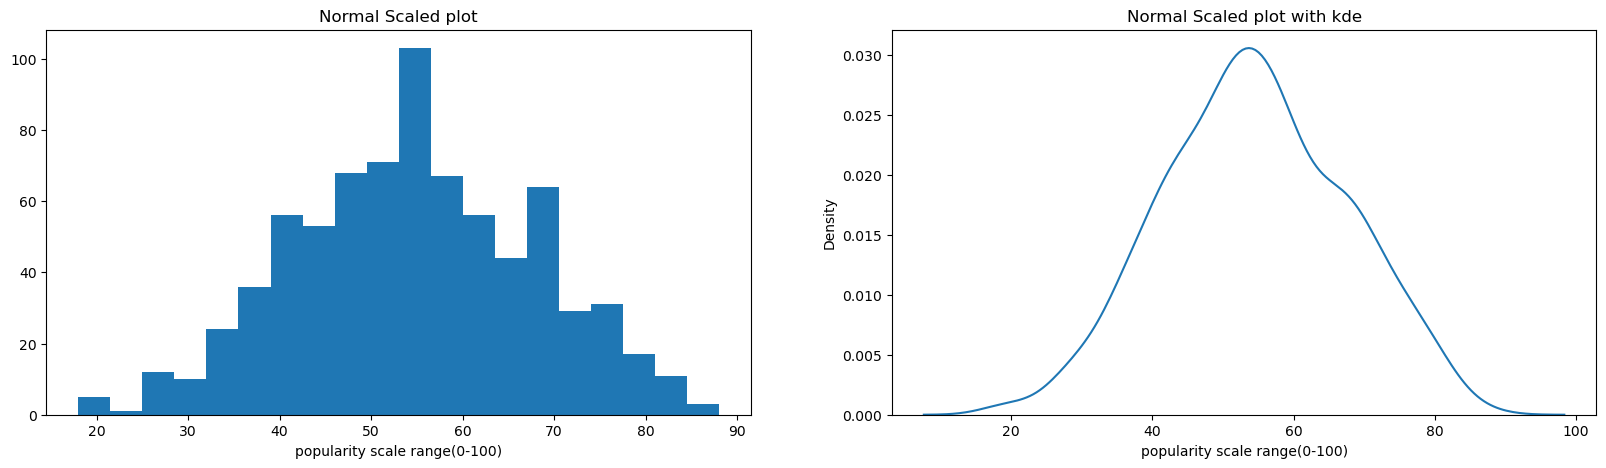

In [135]:
fig = plt.subplots(figsize=[20,5])
plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
bins = np.arange(df['popularity'].min(),df['popularity'].max()+3.5,3.5)
plt.hist(data = df,x='popularity',bins = bins,color = base_color);
plt.title('Normal Scaled plot');
plt.xlabel('popularity scale range(0-100)');

plt.subplot(1,2,2)
sb.kdeplot(data=df,x='popularity');
plt.title('Normal Scaled plot with kde');
plt.xlabel('popularity scale range(0-100)');

- The distribution here looks roughly normal.  
- The largest spike in the frequency is found between the range of 45 to 60 and there is a high spike of frequency in the range of 65-70.
- There seems to be no outliers by looking at this plot. Let's create a boxplot to recheck.

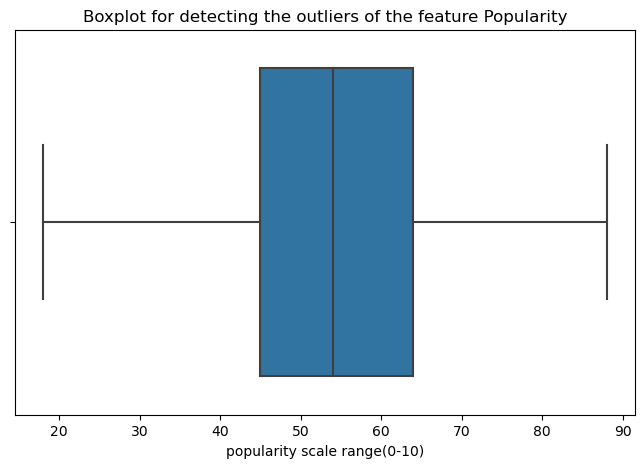

In [136]:
plt.figure(figsize = [8,5])
sb.boxplot(data = clean_df , x='popularity');
plt.xlabel('popularity scale range(0-10)');
plt.title('Boxplot for detecting the outliers of the feature Popularity');

There are no outliers !!

In [137]:
iqr = (np.percentile(clean_df.popularity,75) - np.percentile(clean_df.popularity,25))
clean_df[clean_df.popularity < np.percentile(clean_df.popularity,25) - iqr*1.5]

,artist_id,artists_name,track_id,song_name,album_name,album_type,release_date,popularity,danceability,energy,...,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,time_signatures,duration_m,Tempo_type


In [138]:
clean_df[clean_df.popularity > np.percentile(clean_df.popularity,75) + iqr*1.5]

,artist_id,artists_name,track_id,song_name,album_name,album_type,release_date,popularity,danceability,energy,...,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,time_signatures,duration_m,Tempo_type


#### 2) Univariate Analysis of the feature album_type, key, time_signatures, tempo 
<b>Questions that'll be answered here:
    
Most commonly used key, mode,temp_type, and time signature by the artists.

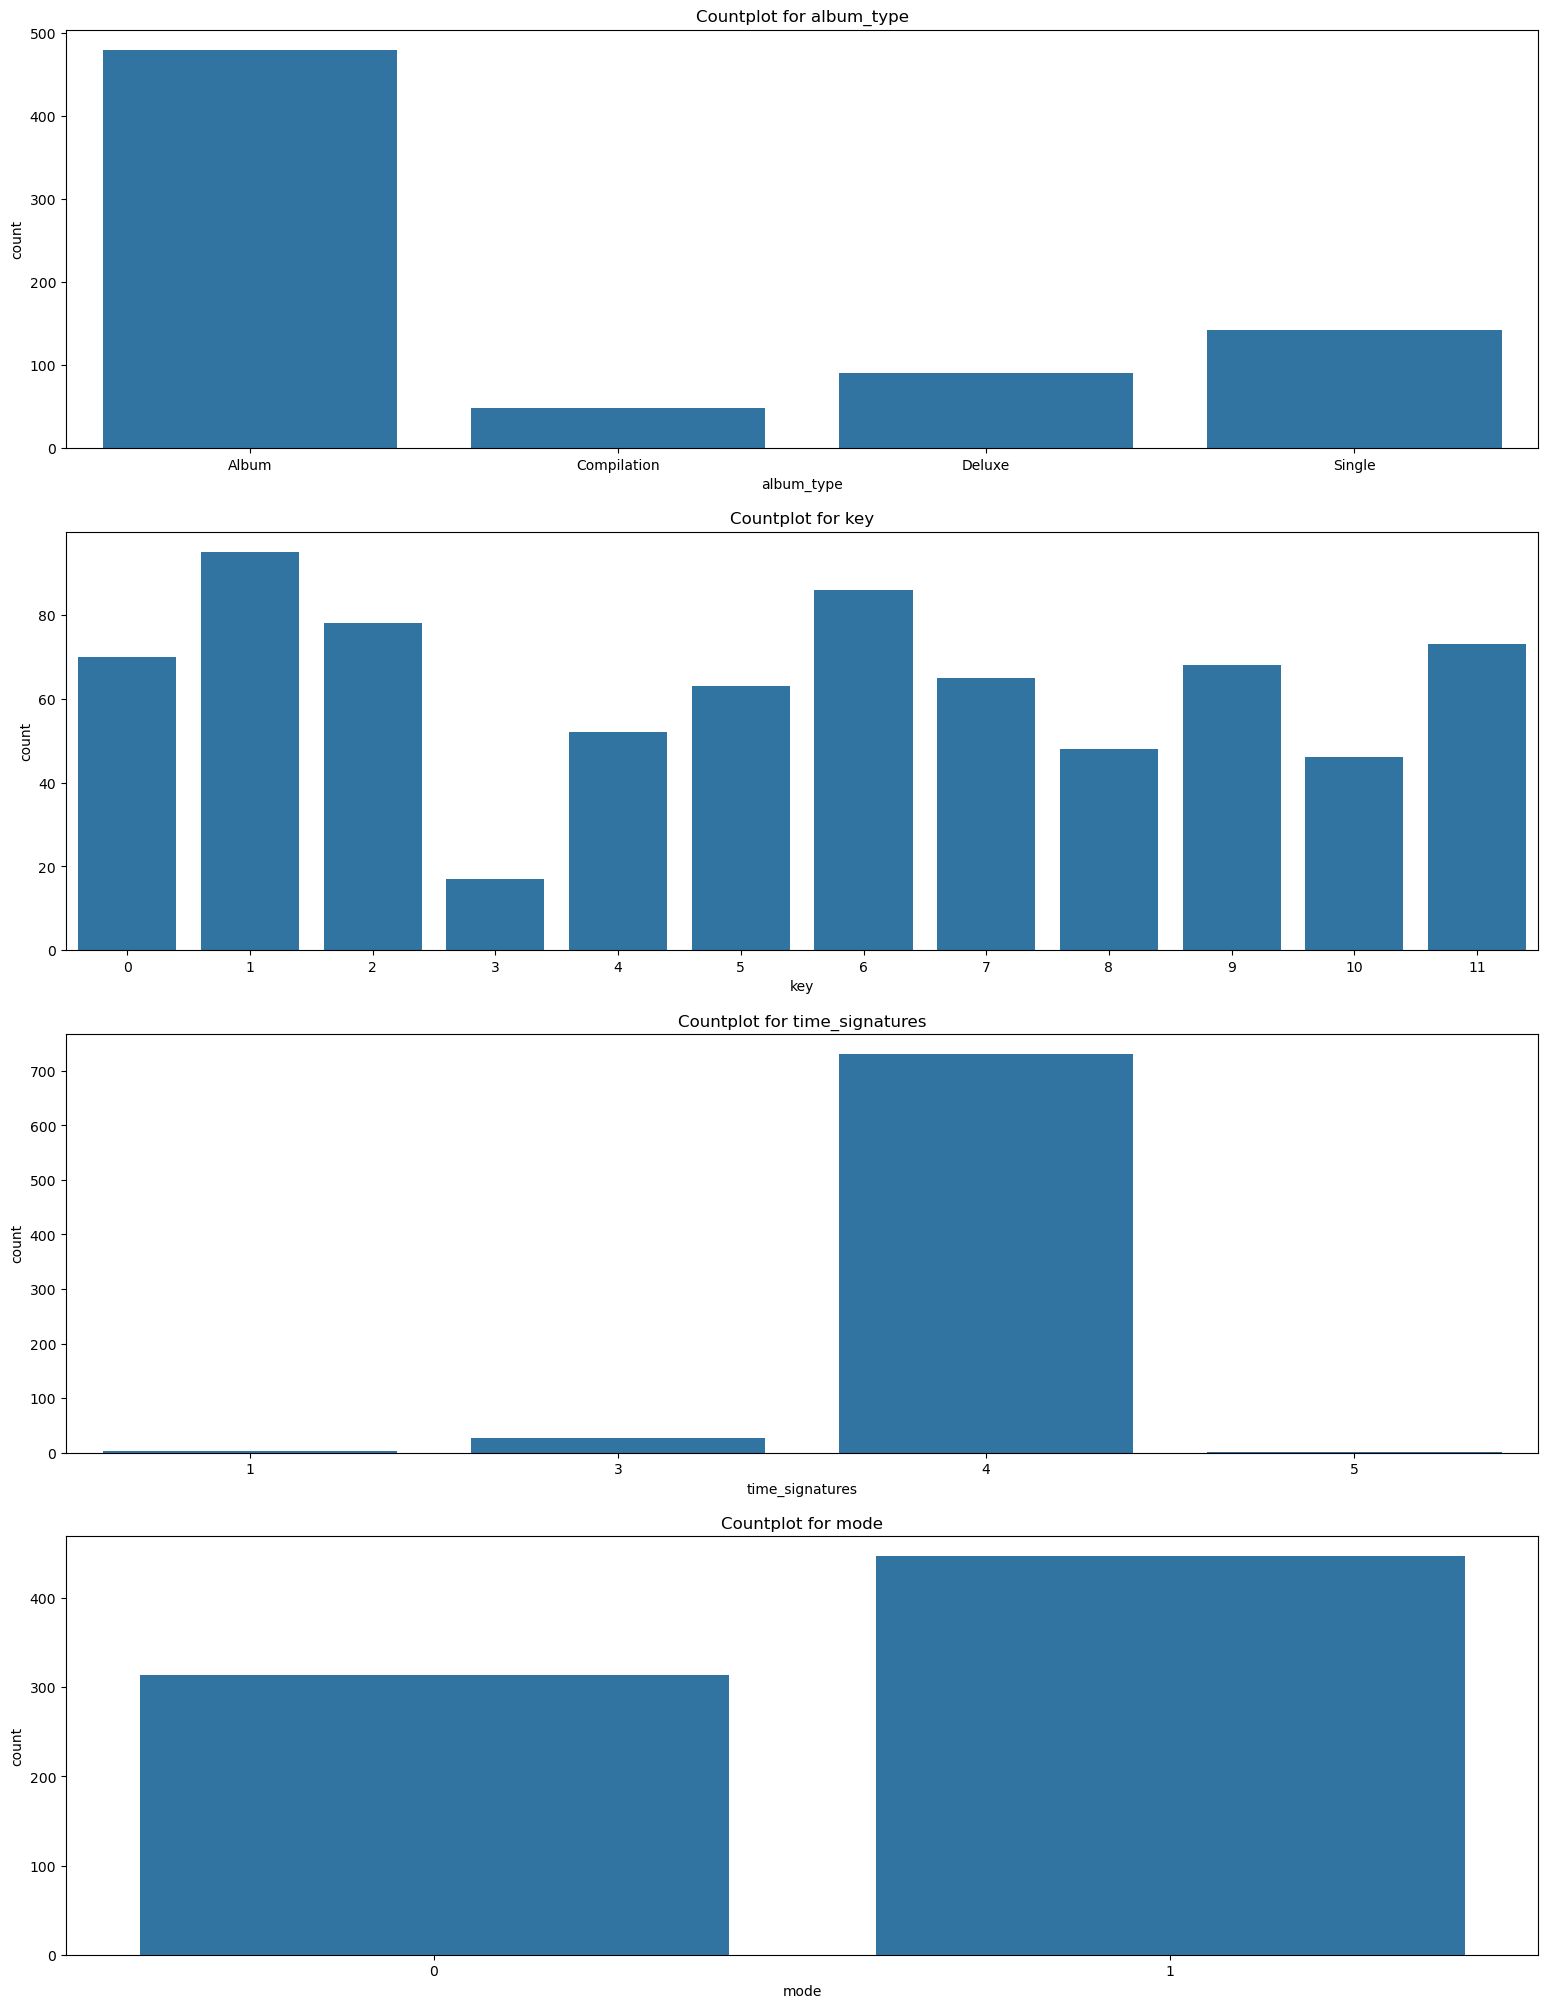

In [141]:
order = clean_df.album_type.value_counts().index
fig, ax = plt.subplots(nrows=4, figsize = [19,25])
base_color = sb.color_palette()[0]
x = ['album_type','key','time_signatures','mode']
for i in range(len(x)):
        sb.countplot(data=clean_df , x = x[i],color=base_color,ax=ax[i]).set(title='Countplot for {}'.format(x[i]));

It's pretty clear that the albumtype 'Album' has the highest count. Then comes Singles,Deluxe and Compilation.

For the key variable, High number of songs were made in the key 1-2 (Csharp and D scale), moderate number of songs used the key 4 to 11 and 1 (E to B scale and C scale),<b> key 3 (D#/Eflat scale) was used the least.</b>

Time signature 4 has been extensively used by the artists. Which is not shocking as 4/4 is the most commonly used time signature. The gap between the 4 and rest of the time signatures is significantly high.

There are more mode1 (Major) songs than mode 0 (Minor). <b>(mode 1 has 84 songs more than mode 2)


#### 3) Univariate Analysis of the feature tempo and Tempo_type:
<b>Questions that'll be answered here:  </b>
The distribution of tempo and 
in what range do the majority of songs lie?

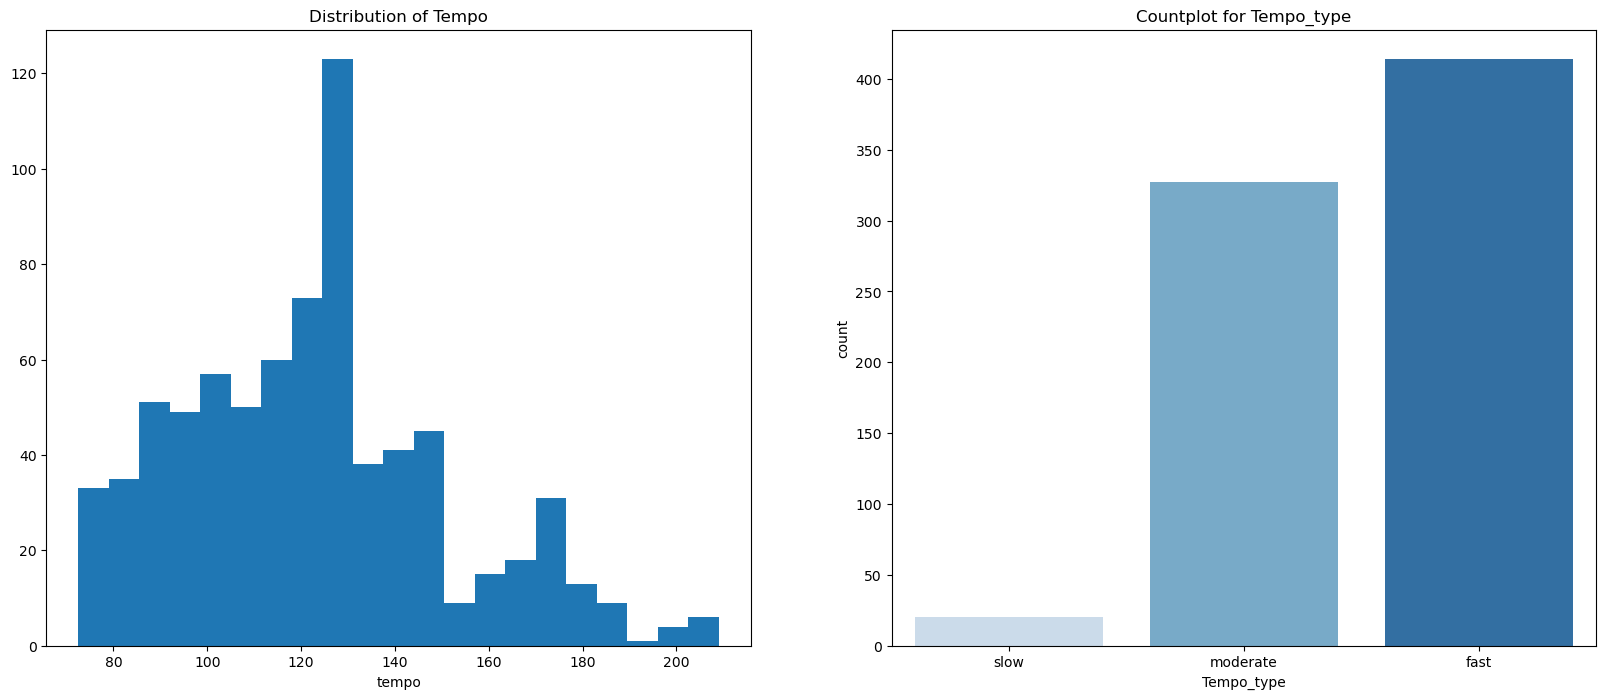

In [142]:
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.title('Distribution of Tempo')
bins = np.arange(clean_df.tempo.min(),clean_df.tempo.max()+6.5,6.5)
plt.hist(data = clean_df , x = 'tempo',bins=bins);
plt.xlabel('tempo');
plt.subplot(1,2,2)
sb.countplot(data=clean_df,x='Tempo_type',palette = 'Blues').set(title='Countplot for Tempo_type');

A pattern is detected here, there is an increase in the frequency from 80-100 and the largest spike in the frequency is found between the range of 120 to 130; The frequency quickly trails off until the next spike which is less than the previous spike and so on. These probably represent standard tempo used by the artists. The least used tempo is near 200 and above. We do not have any songs of tempo less than 72 in our dataset.

Artists have used fast tempo more than moderate and slow. Although, moderate and fast tempo do not have a huge gap. The least used tempo was "slow".

#### 4) Univariate Analysis of duration_ms
<b>Questions that'll be answered here:    
    
What is the duration for the majority of the songs?

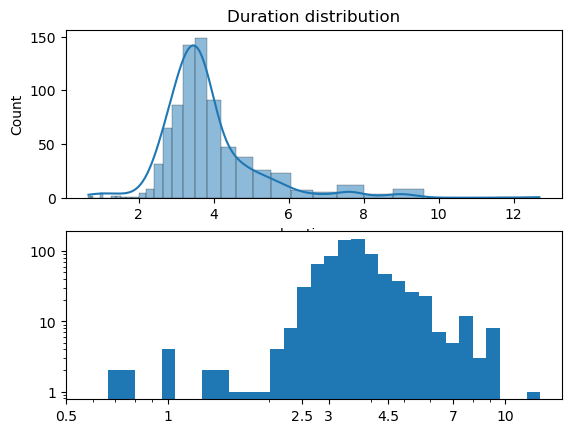

In [143]:
bins = 10**np.arange(np.log10(clean_df.duration_m).min(),np.log10(clean_df.duration_m).max()+0.04,0.04)
plt.subplot(2,1,1)
sb.histplot(data=clean_df , x='duration_m',kde=True,bins=bins)
plt.title('Duration distribution')

plt.subplot(2,1,2)
plt.hist(data=clean_df , x='duration_m',bins=bins);
plt.xscale('log')
plt.yscale('log')
xticks = [0.5,1,2.5,3,4.5,7,10]
xlabels = ['0.5','1','2.5','3','4.5','7','10']
plt.xticks(xticks,xlabels);
plt.yticks([1,10,100],['1','10','100']);

In [146]:
np.mean(clean_df.duration_m),np.median(clean_df.duration_m)

(3.8013735216819966, 3.5462166666666666)

As the normal scaled plot has a long tail in the distribution, we use the log scale transformation on the x and y axis. The mean is slightly greater than the median in this distribution and the majority data points are clustered towards the mean. The majority of songs have the duration between 3 to 4.5 minutes.<b> There is some discrete data at the low end (below 2 mins) as well as high end (above 8 mins) in the distribution.</b>

Let's find out these outliers and the reason why we are getting these outliers.

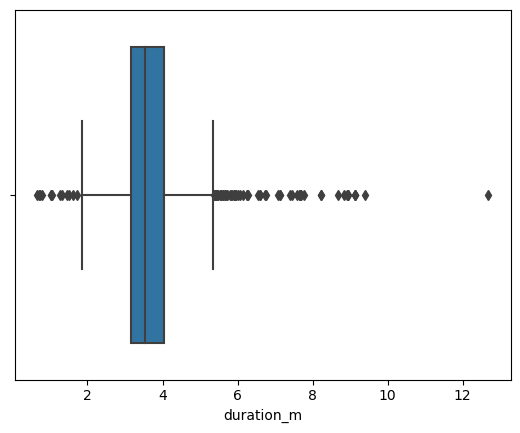

In [152]:
sb.boxplot(data=clean_df,x='duration_m');

In [153]:
clean_df.query('duration_m <=2')

,artist_id,artists_name,track_id,song_name,album_name,album_type,release_date,popularity,danceability,energy,...,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,time_signatures,duration_m,Tempo_type
44,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes,138oQeapLds5IeJrdRfeUd,Intro,Wonder,Album,2020-12-04,50,0.498,0.1990,...,-11.011,0.000573,0.4930,0.933000,76.046,1,0.4700,4,1.040383,slow
70,7CajNmpbOovFoOoasH2HaY,Calvin Harris,3rWepjMBxRG7J3ikhmN6X2,Intro,Funk Wav Bounces Vol. 2,Album,2022-08-05,38,0.418,0.2200,...,-13.920,0.981000,0.1130,0.868000,144.052,1,0.6650,1,0.665633,fast
277,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,5Q7xgSQqyhwrC2fJAXLeWE,Interlude,Different World,Album,2018-12-14,44,0.467,0.0262,...,-14.617,0.950000,0.1320,0.917000,130.253,1,0.2180,4,1.318450,fast
281,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,7dcmZskqXONZuIuqGRLJ1C,Intro,Different World,Album,2018-12-14,49,0.399,0.2220,...,-11.073,0.802000,0.0906,0.864000,128.231,1,0.0387,4,1.268667,fast
287,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,02Jk9LuQmKe6YYFfcRdXpY,Faded (Interlude),Different World,Album,2018-12-14,46,0.347,0.3060,...,-19.755,0.967000,0.1660,0.761000,179.792,1,0.0862,4,0.697783,fast
376,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4K09vJ27xCOreumtSuU6Ao,Silk Sonic Intro,An Evening With Silk Sonic,Album,2021-11-12,53,0.696,0.5530,...,-8.702,0.000004,0.6170,0.097000,114.993,1,0.6740,4,1.051000,moderate
467,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,5CGS4UovzA7ftCJkLVXQju,I Love Kanye,The Life Of Pablo,Album,2016-06-10,60,0.756,0.3740,...,-7.966,0.000000,0.2170,0.594000,80.326,1,0.9660,4,0.747117,moderate
508,3qm84nBOXUEQ2vnTfUTTFC,Guns N' Roses,0ivarc4umuzp5I3J7lPDJc,Attitude,The Spaghetti Incident?,Album,1993-11-23,47,0.340,0.9840,...,-2.533,0.000000,0.3310,0.000249,187.766,1,0.6130,4,1.450000,fast
542,7oPftvlwr6VrsViSDV7fJY,Green Day,6uWp8yAt8dN5ZaT7REJ6RV,Jaded,Insomniac,Album,1995-10-10,45,0.254,0.9950,...,-3.068,0.000041,0.0392,0.000030,159.336,1,0.8430,4,1.503783,fast
551,7oPftvlwr6VrsViSDV7fJY,Green Day,6QlyzIamWoVeut7Hc7tZRc,Brat,Insomniac,Album,1995-10-10,45,0.323,0.9880,...,-4.033,0.000000,0.0310,0.000212,178.645,1,0.9690,4,1.722217,fast


In [154]:
clean_df.query('duration_m >=10')

,artist_id,artists_name,track_id,song_name,album_name,album_type,release_date,popularity,danceability,energy,...,loudness,instrumentalness,liveness,acousticness,tempo,mode,valence,time_signatures,duration_m,Tempo_type
473,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,7iOhWWYjhhQiXzF4o4HhXN,Last Call,The College Dropout,Album,2004-02-10,54,0.473,0.727,...,-6.843,0.0,0.316,0.577,83.212,1,0.854,4,12.682883,moderate


In [157]:
# 475 is index number of the record containing the duplicate data
clean_df.drop([373], inplace = True )

In [ ]:
clean_df.query('duration_m <=2 and song_name == "Silk Sonic Intro"')

The low end outliers are either interlude or intro songs and the high end outliers are actually really long songs. Hence, we cannot impute any of the songs as these are neither duplicate values nor wrong information. We can only delete one of the records of the song name "Silk Sonic Intro" as it has a duplicate record.

#### 5) Number of songs released from 1970-2023

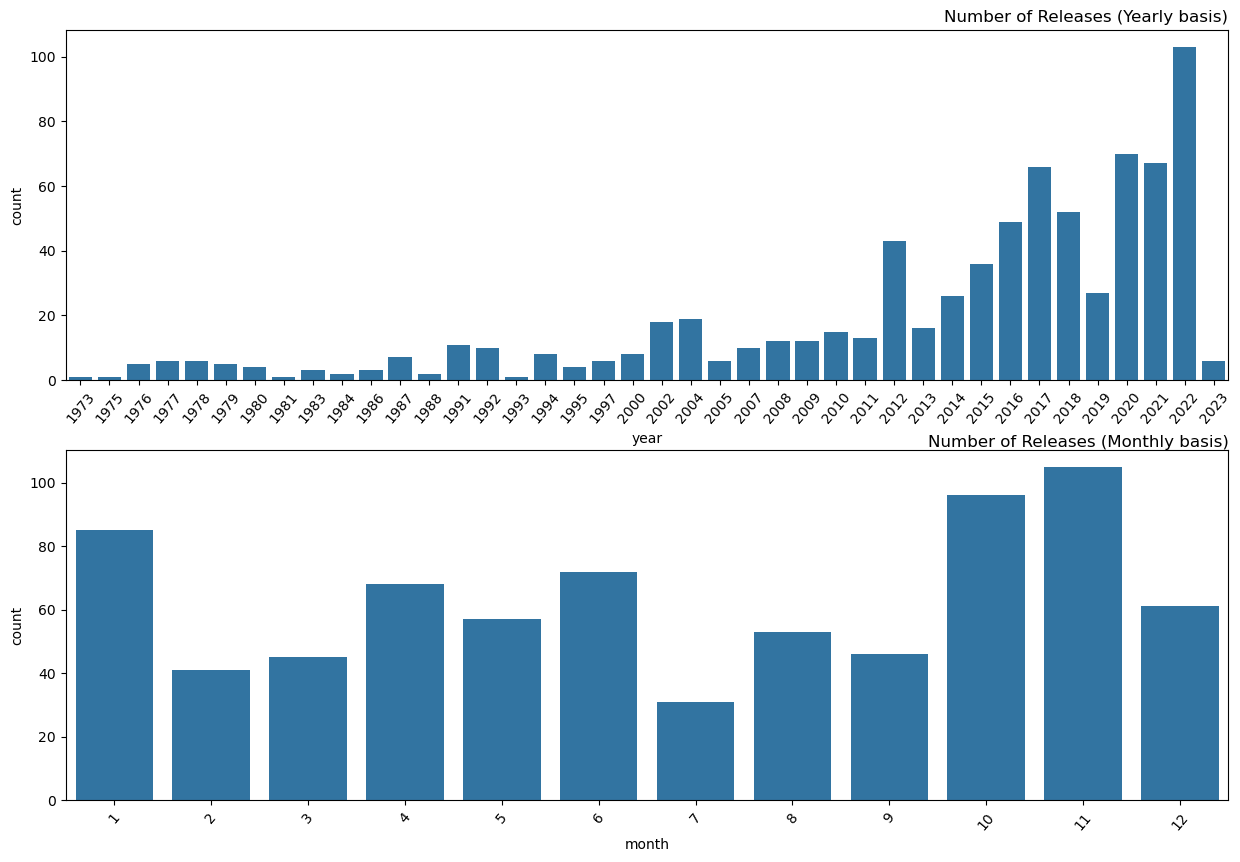

In [159]:
clean_df['year'] = clean_df['release_date'].dt.year.astype('category')
clean_df['month'] = clean_df['release_date'].dt.month.astype('category')
fig,axes = plt.subplots(figsize=[15,10],nrows = 2)
s = sb.countplot(data = clean_df,x='year',ax=axes[0],color=base_color);
s.set_xticklabels(s.get_xticklabels(), rotation=50)
s.set_title('Number of Releases (Yearly basis)',loc='right')
s = sb.countplot(data = clean_df,x='month',ax=axes[1],color = base_color);
s.set_xticklabels(s.get_xticklabels(),rotation=50);
s.set_title('Number of Releases (Monthly basis)',pad=-10,loc='right');

In [57]:
df.release_date.min(),df.release_date.max()

(Timestamp('1973-04-13 00:00:00'), Timestamp('2023-02-10 00:00:00'))

According to per year we can observe a incresing trend of releases of songs, as we have just started with the year 2023, we do not have many 2023 releases yet from the artists that i have chosen for my analysis. The months when highest songs have been released are October,November,June, April, and January

### 6) Is it profitable for a musician to release a deluxe album along with the original album? Are the songs getting more recognised by releasing the deluxe albums?

What is a deluxe album? 
A Deluxe Album comprise of the original album tracks with some additional covers, could be live or acoustic cover of some songs of their original album
#### Univariate Analysis: Comparing histograms of album Popularity and deluxe Popularity  
I created two dataframes, <b>deluxe_albums dataframe</b> contains all the deluxe album type songs and <b>album dataframe</b> contains all the original album type songs whose deluxe version has been released. To make the comparison clearer I only kept the songs which are present in both the album types. So that we can compare songs from <b>original album vs songs from deluxe albums.</b> 

In [160]:
album = clean_df.query('album_type == "Album"') #consists of album_type albums
deluxe_albums = clean_df.query('album_type == "Deluxe"') #consists of album_type deluxe

deluxe_songs_name = list(deluxe_albums.song_name.value_counts().index) #song names in deluxe
album_songs_name = list(album.song_name.value_counts().index) # song names in album

same_songs_list = []
for i in deluxe_songs_name:
        for j in album_songs_name:
            if j == i:# if both the album types song names are equal then append to list
                same_songs_list.append(j) 

deluxe_albums = deluxe_albums[deluxe_albums.song_name.isin(same_songs_list)]
album = album[album.song_name.isin(same_songs_list)]
album = album[album.song_name.duplicated()==False]

con = pd.concat([album,deluxe_albums])
con.album_type.value_counts()

Album          42
Deluxe         42
Compilation     0
Single          0
Name: album_type, dtype: int64

<i>Hence now the comparison can be fair as we are comparing only the songs which are present in both the albums types.</i>

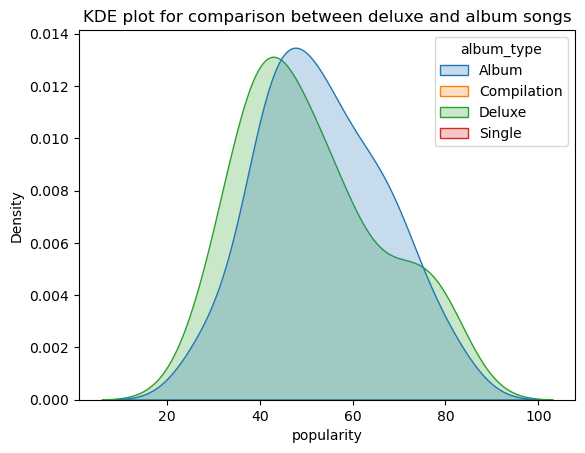

In [161]:
plt.title('KDE plot for comparison between deluxe and album songs')
sb.kdeplot(data=con,hue='album_type',x='popularity',fill=True);

- Album distribution is normal and majority of popularity ranges from 40 to 75, in the case of Deluxe the majority of the songs popularity lie in between 35 to 60.
- Notice that at the right tail of the distribution (near 80 to 100 range which is the highest popularity scale) the frequency of Deluxe album_type is slightly higher than the Album album_type.
- Although overall "Album" album_type songs are more popular than the "Deluxe" album_type songs but <b>the songs from a Deluxe album does give a positive boost to the popularity of a song if that song is near 80 to 100 range popularity.</b>

## Bivariate Analysis

#### 1) Pairwise Correlation
Before we start with our Bivariate Analysis part let's look at the pairwise correlations between features in the data

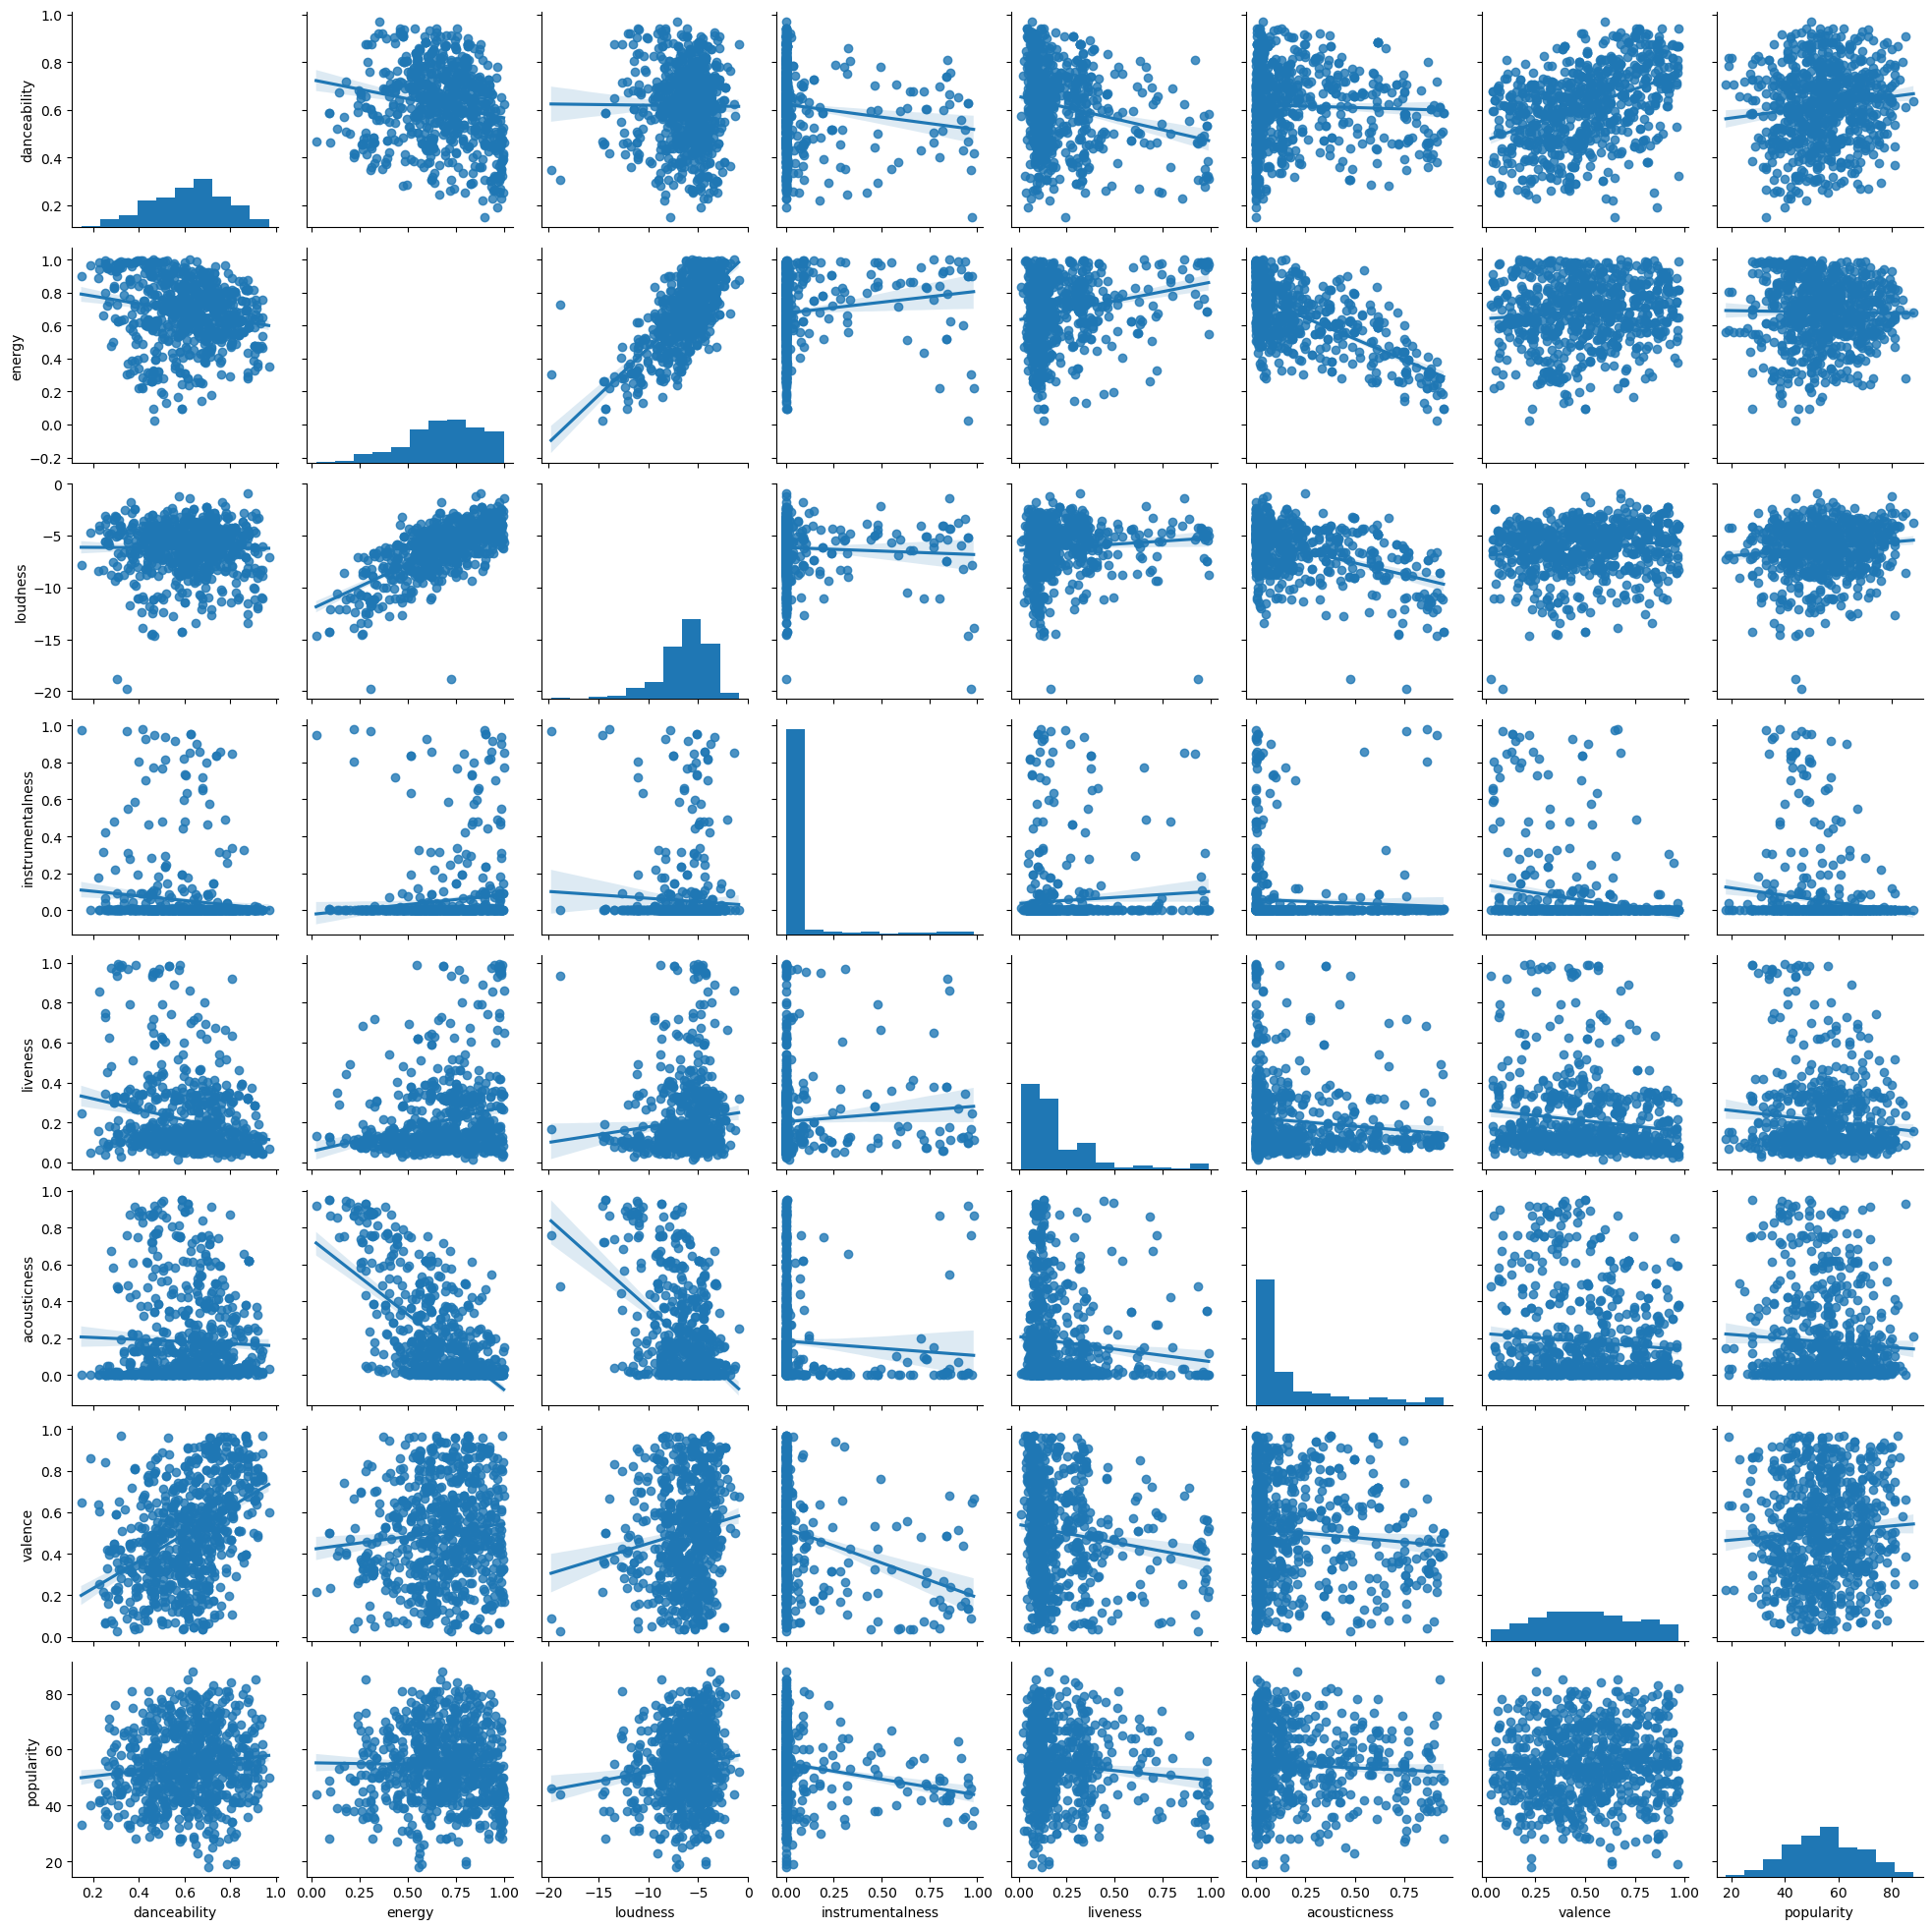

In [60]:
num = [ 'danceability', 'energy','loudness', 'instrumentalness', 'liveness', 'acousticness','valence','popularity']
g = sb.PairGrid(data = clean_df, vars = num)
g.map_diag(plt.hist);
g.map_offdiag(sb.regplot)

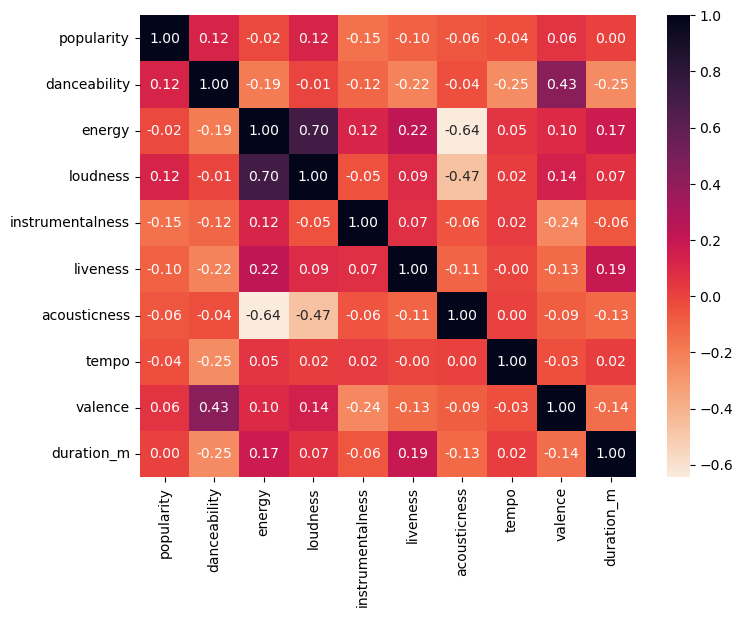

In [61]:
plt.figure(figsize=[8,6])
sb.heatmap(df.corr(),annot = True,fmt='.2f',cmap='rocket_r');

Here we can see that the <b>correlation coefficient of energy and loudness are really high. Hence, there is a  positive correlation coefficient between energy and loudness.</b>
There's a strong and positive Correlation between Danceabiility and valence.

Danceability is opposite of energy when it comes to correlation with liveness (-0.237).

When we compare the correlation between popularity and all other features, we don't see a strong correlation (a linear relationship) that gives us a clear information about popularity. The popularity has a positive correlation(0.1) with the loudness and danceability(0.1).

#### 2) Relationship between audio features

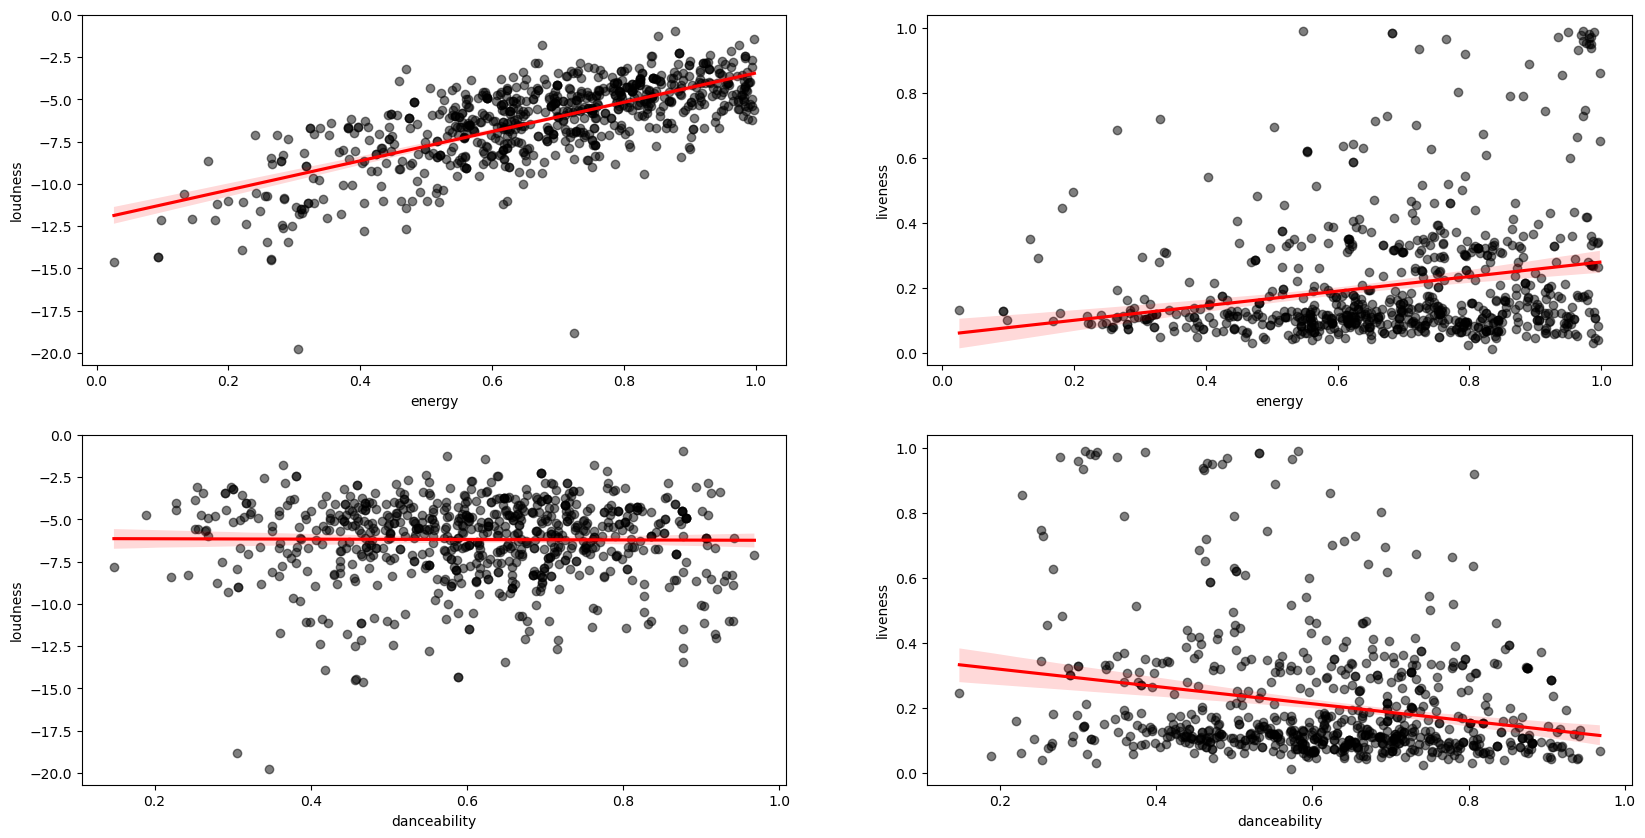

In [62]:
x = ['energy','danceability']
y = ['loudness','liveness']
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i in range(len(x)):
    for j in range(len(y)):
        sb.regplot(data = clean_df, x = x[i],y=y[j],
                   color = base_color,ax=axes[i,j],
                   scatter_kws={"color": "black","alpha":0.5}, line_kws={"color": "red"});

There is a strong positive correlation coefficient between energy and loudness. This is expected as "Energy" is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.<b> Majority of songs are more in energy as well as loudness.</b>


There are 10-15 songs with really high (range 0.9 to 1) energy value and liveness(0.9 to 1), <b>majority of the songs are less in liveness and more in energy.</b> There are less number of songs with low energy and high liveness. The overall correlation coefficient between energy and liveness is positive but weak.

There is clearly a weak negative correlation here, <b>majority of the songs have less liveness(below 0.2) and high danceability(0.5 to 0.8).</b> We can see a few songs with really high liveness (above 0.5) and (0.3 to 0.8)low to high danceability.

<b>Liveness is overall less in majority of songs, as our songs are more from album covers than live covers hence this was expected. Majority of songs liveness is between 0.05 to 0.2.

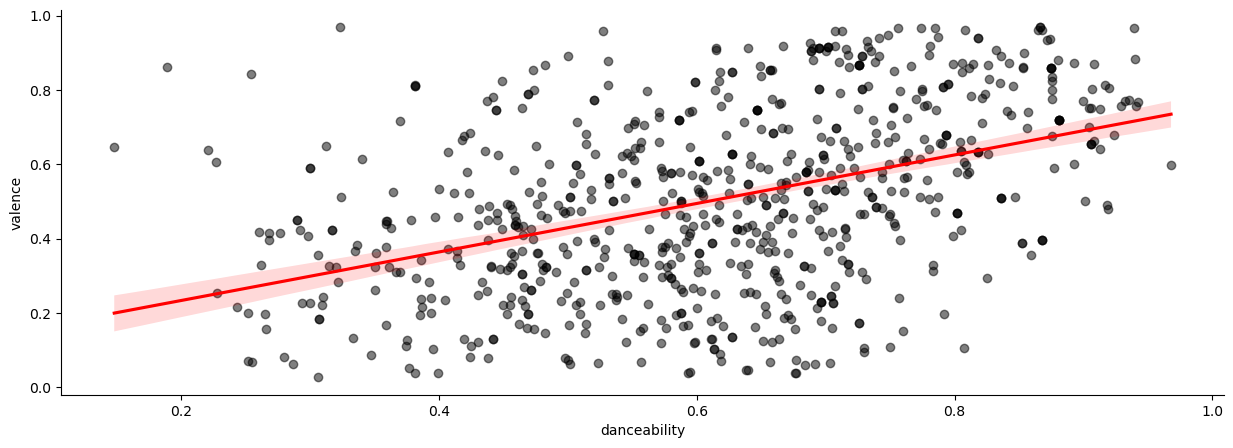

In [63]:
fig,ax = plt.subplots(figsize=[15,5])
ax.spines[['right', 'top']].set_visible(False)
sb.regplot(data = clean_df, x = 'danceability',y='valence',color = base_color,scatter_kws={"color": "black","alpha":0.5}, line_kws={"color": "red"});

There is a strong and positive correlation coefficient between danceability and valence which means that <b>higher dancable songs have higher valence(more positive/happy feeling).</b>

#### 3) Relationship between popularity and loudness/danceability (as they were positively correlated to popularity)

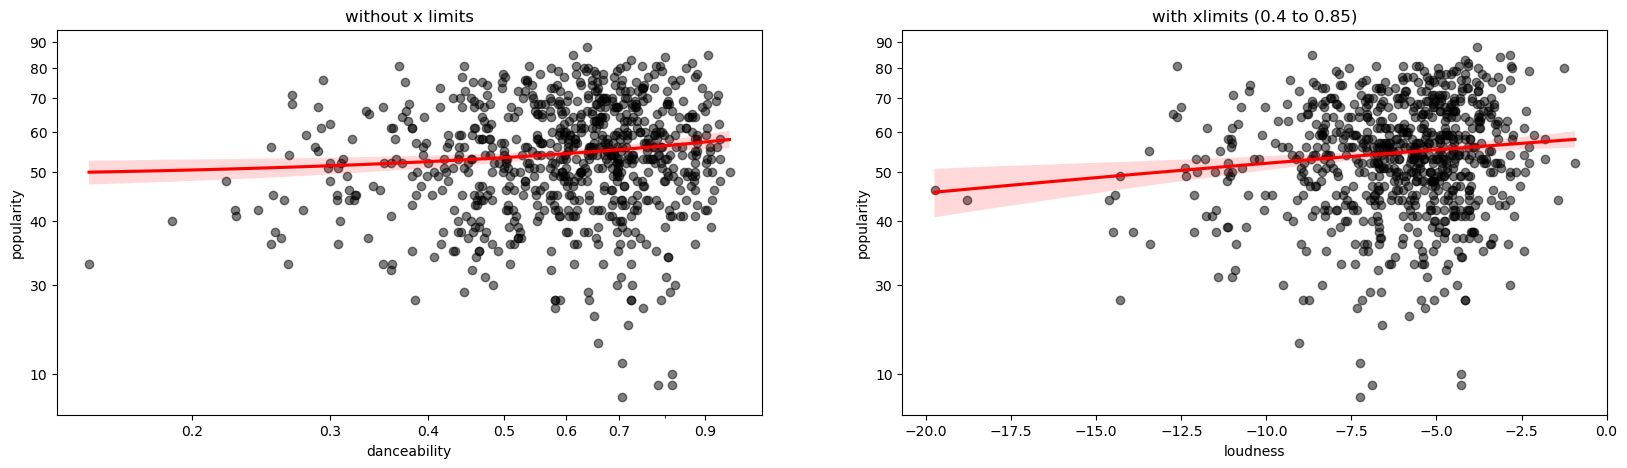

In [64]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('without x limits')
sb.regplot(data=clean_df,x='danceability',y='popularity',
           scatter_kws={"color": "black","alpha":0.5}, line_kws={"color": "red"})
plt.xscale('log')
plt.yscale('log')
plt.xticks([0.2,0.3,0.4,0.5,0.6,0.7,0.9],['0.2','0.3','0.4','0.5','0.6','0.7','0.9']);
plt.yticks([20,30,40,50,60,70,80,90],['10','30','40','50','60','70','80','90']);


plt.subplot(1,2,2)
plt.title('with xlimits (0.4 to 0.85)');
sb.regplot(data=clean_df,x='loudness',y='popularity',
           scatter_kws={"color": "black","alpha":0.5}, line_kws={"color": "red"});
plt.yscale('log')
plt.yticks([20,30,40,50,60,70,80,90],['10','30','40','50','60','70','80','90']);


- We can obsereve that majority of songs are in high danceability(above 0.45) and their popularity range is between 45 to 75. There are a few songs with high danceability(0.6 - 0.85) but low popularity(below 30) and, less danceability and high popularity.
- The loudness definitely needs to be below 0, for gaining any kind of popularity. The majority songs have loudness between -7.5 to -3.5 and the popularity range is from 45 to 75.
- Both the scatter plots look quite similar and the range of popularity is almost equal.

#### 4) A dodged pointplot for finding the highest popular album_type. 

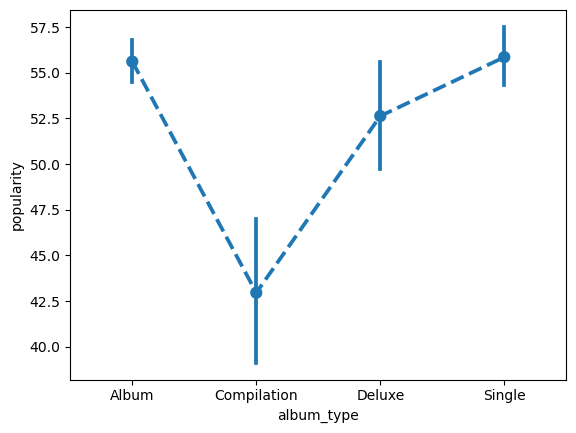

In [65]:
sb.pointplot(data= clean_df, x='album_type', y='popularity',linestyles='--');

In our univariate analysis we came to know that Deluxe does affect the popularity of the original album songs in a positive way if the popularity is above 80.

<b>Interestingly the songs of "Single" album type are more popular than the songs of the "Album" album type</b>, but we also have to consider the error bars of these data points, the "Album" album_type data is concentrated and is signalling that the plotted average is more likely/reliable, compared to the "Single" album_type data. Album and Deluxe albums are almost equal in popularity.  Compilation album has the lowest popularity.

#### 5) Top 50 popular songs :  

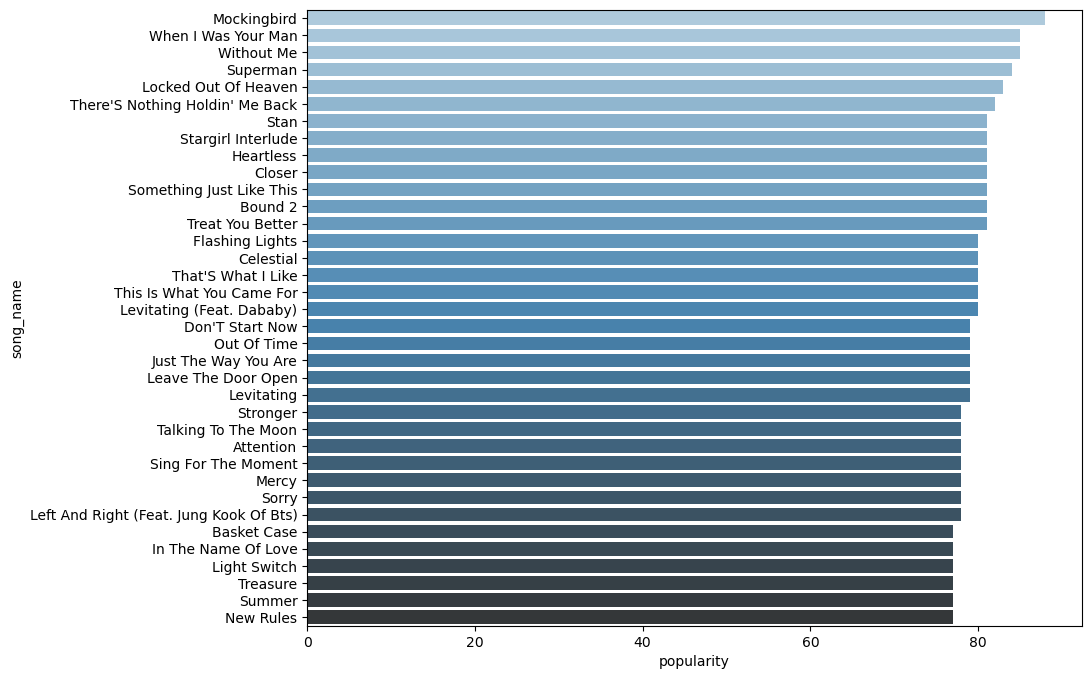

In [66]:
# choosing the songs having popularity above the 95th percentile
plt.figure(figsize=[10,8])
top  = clean_df[clean_df['popularity'] > np.percentile(df.popularity,95)].sort_values(by='popularity', ascending=False).head(50)
sb.barplot(data = top, y='song_name',x='popularity',palette = 'Blues_d');

<center><img src = "https://i.discogs.com/DJlkS4zt8aDnF3UYsw7el-HvNbPcaHlWmTu4plRuZZ0/rs:fit/g:sm/q:90/h:600/w:554/czM6Ly9kaXNjb2dz/LWRhdGFiYXNlLWlt/YWdlcy9SLTI1MzQ2/MDAtMTYyOTgwNzUx/Mi04NDI0LmpwZWc.jpeg" width=300/></center>

<center>The most famous song is "Mocking Bird" by Eminem!! The popularity is 88 for this song.</center>

#### 6) Top 20 popular albums

In [67]:
d = clean_df.groupby('album_name').filter(lambda x : len(x)>2)
dfff = d.groupby(['album_name'])['popularity'].mean().sort_values(ascending=False).head(20)
dffff =  d.groupby(['album_name','artists_name','album_type'])['popularity'].mean().sort_values(ascending=False).head(20)

top_20 = dffff.head(20).to_frame(name = None)
top_20= top_20.reset_index()
top_20

,album_name,artists_name,album_type,popularity
0,Doo-Wops & Hooligans,Bruno Mars,Album,77.000000
1,My Beautiful Dark Twisted Fantasy,Kanye West,Album,71.666667
2,Graduation,Kanye West,Album,70.714286
3,The Eminem Show,Eminem,Album,69.111111
4,24K Magic,Bruno Mars,Album,68.571429
5,÷ (Deluxe),Ed Sheeran,Deluxe,68.000000
6,Dawn FM,The Weeknd,Album,67.875000
7,Motion,Calvin Harris,Album,66.166667
8,Starboy,The Weeknd,Album,66.142857
9,Wonder,Shawn Mendes,Single,66.000000


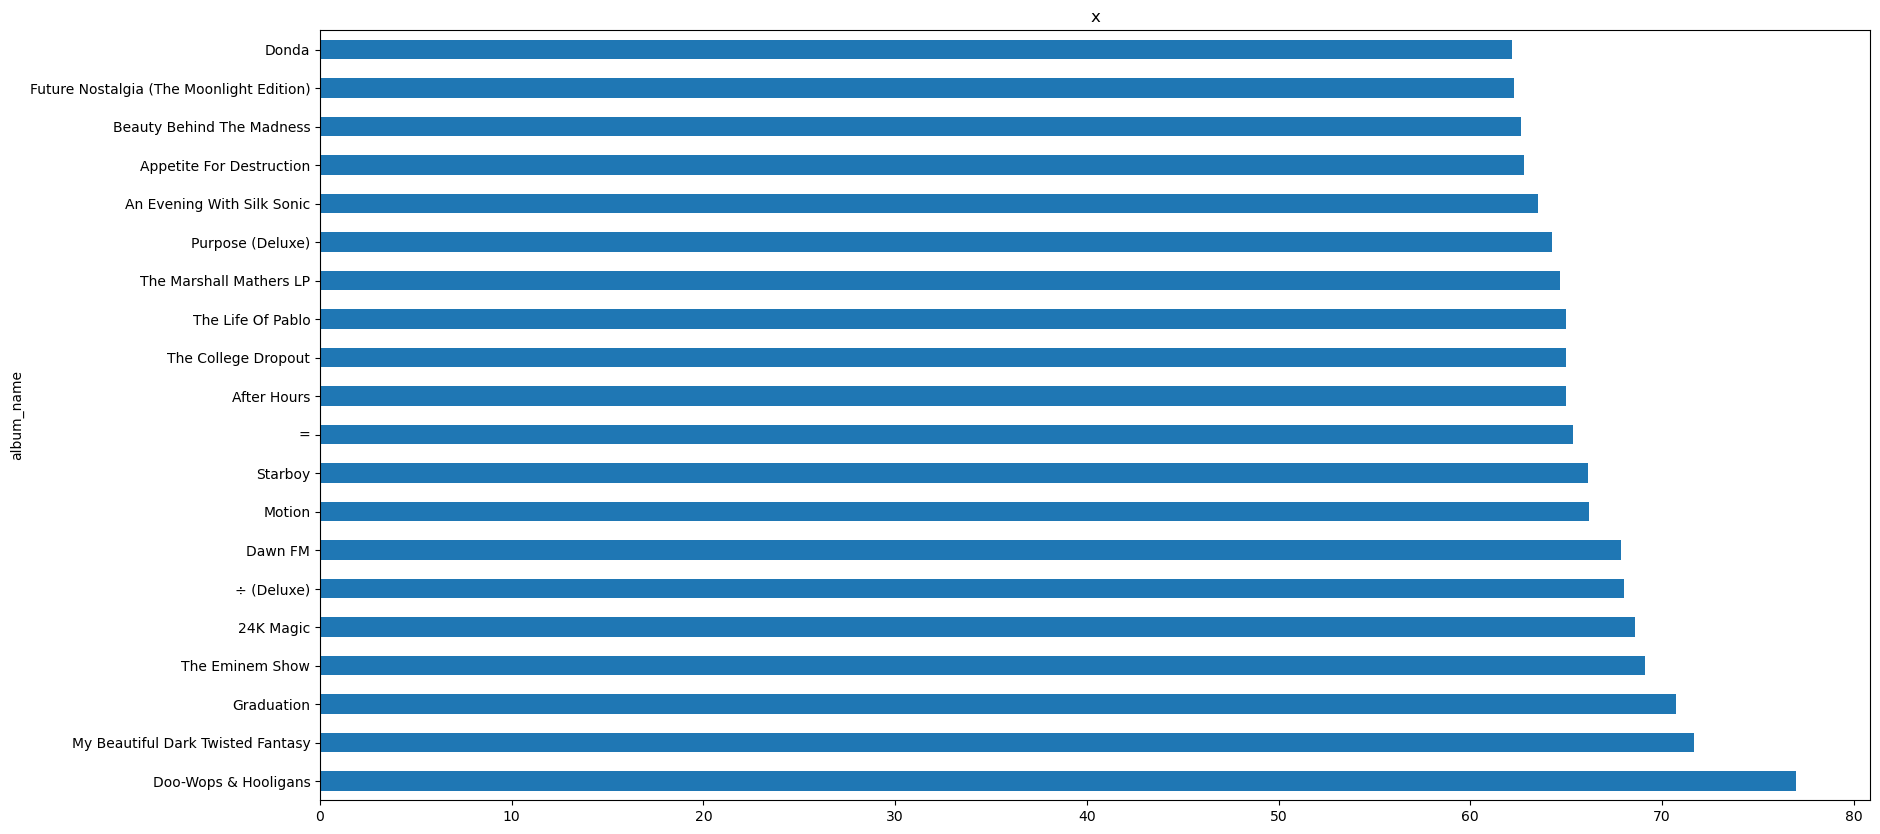

In [68]:
plt.figure (figsize=[20,10])
ll = list(top_20.artists_name.value_counts().index)
dfff.plot(kind='barh',title='x');


<center><img src="https://kbimages1-a.akamaihd.net/df79473d-81ea-4c93-a0b7-59e32bf5a5fd/353/569/90/False/bruno-mars-doo-wops-hooligans-songbook.jpg" width=250/></center>

<center>"Doo-Wops & Hooligans" album by Bruno Mars has the highest popularity of 77!!<center>

#### 7) The artist with highest number of popular albums

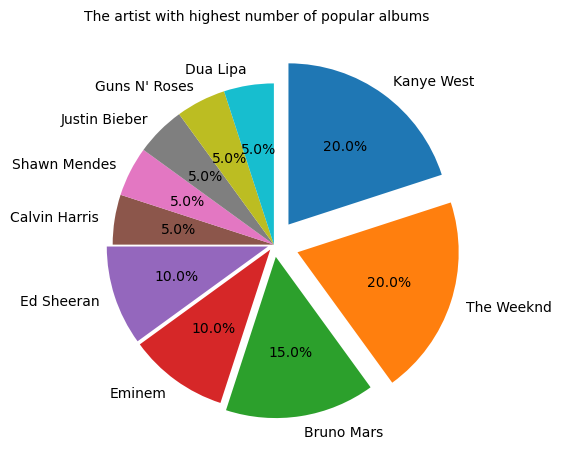

In [164]:
plt.figure(figsize=[4,5])
data = top_20.artists_name.value_counts()
plt.pie(data,explode=[0.2,0.2,0.1,0.05,0.05,0,0,0,0,0],labels = ll,startangle = 90, counterclock = False,radius=1.3,labeldistance=1.1,autopct='%1.1f%%');
plt.title('The artist with highest number of popular albums',loc='right',fontdict= {'fontsize':10,'verticalalignment':'baseline'},pad=50);     

Kanye West and The Weeknd have the highest number of popular albums, Second is Bruno Mars, Third are Eminem and ED Sheeran,they have the same number of high popular albums.

#### 8) Which artist has the highest popularity in average/overall?

In [70]:
clean_df.groupby('artists_name')['popularity'].mean().sort_values(ascending=False).to_frame()

,popularity
artists_name,
Kanye West,64.326087
Eminem,59.897959
The Weeknd,59.565217
Dua Lipa,59.444444
Alan Walker,56.675000
The Chainsmokers,56.581395
Bruno Mars,54.813953
Calvin Harris,54.347826
Justin Bieber,54.073171


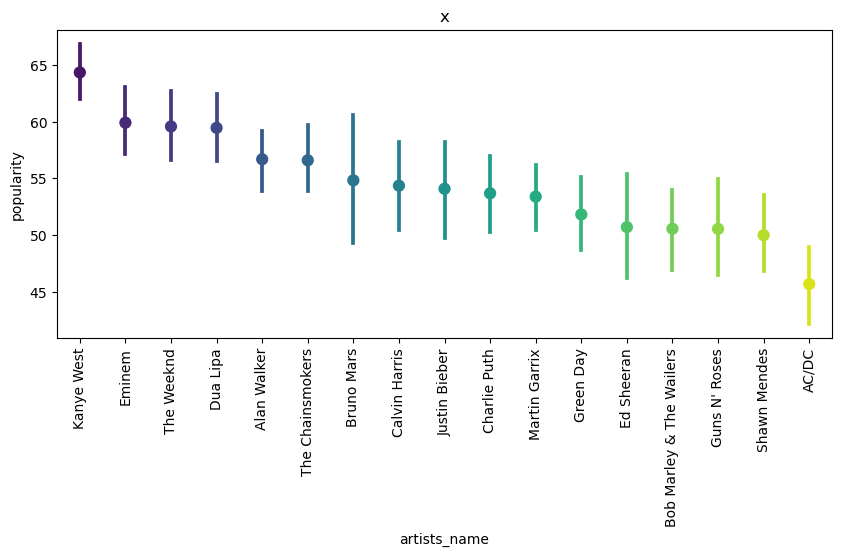

In [71]:
plt.figure(figsize=[10,4])
i = clean_df.groupby('artists_name')['popularity'].mean().sort_values(ascending=False).index
sb.pointplot(data=clean_df, x='artists_name',y='popularity',dodge=True,errorbar='se',order= i,palette='viridis');
plt.xticks(rotation=90);
plt.title('x');

<center><img src="https://w0.peakpx.com/wallpaper/497/617/HD-wallpaper-kanye-west-fashion-entrepreneur-producer-singer.jpg" width = 450 /></center>

<center>The highest popular song was sung by Eminem and the highest popular album was composed/sung by Bruno Mars but the artist having the highest number of popular albums were Kanye West and The Weeknd.</center> 

<center>From the plot we can see that Kanye West is the highest popular artist. The second highest popular artists is Eminem (Weeknd/Dua Lipa have almost equal popularity as Eminem).</center>

#### 9) Which artist/band has the most positive feeling/vibe songs and, has the highest dancable songs?

In [72]:
d1 = clean_df.groupby(['artists_name'])['valence'].mean().sort_values(ascending=False).to_frame()
d2 = clean_df.groupby(['artists_name'])['danceability'].mean().sort_values(ascending=False).to_frame()
df_valence_dance = d1.join(d2,on='artists_name',how='inner')
df_valence_dance

,valence,danceability
artists_name,,
Bob Marley & The Wailers,0.753738,0.796690
Green Day,0.654957,0.431106
Dua Lipa,0.633889,0.737644
Calvin Harris,0.632739,0.675804
Bruno Mars,0.629360,0.700814
Charlie Puth,0.622367,0.701327
Ed Sheeran,0.552595,0.618310
Justin Bieber,0.537217,0.640561
Shawn Mendes,0.491224,0.606204


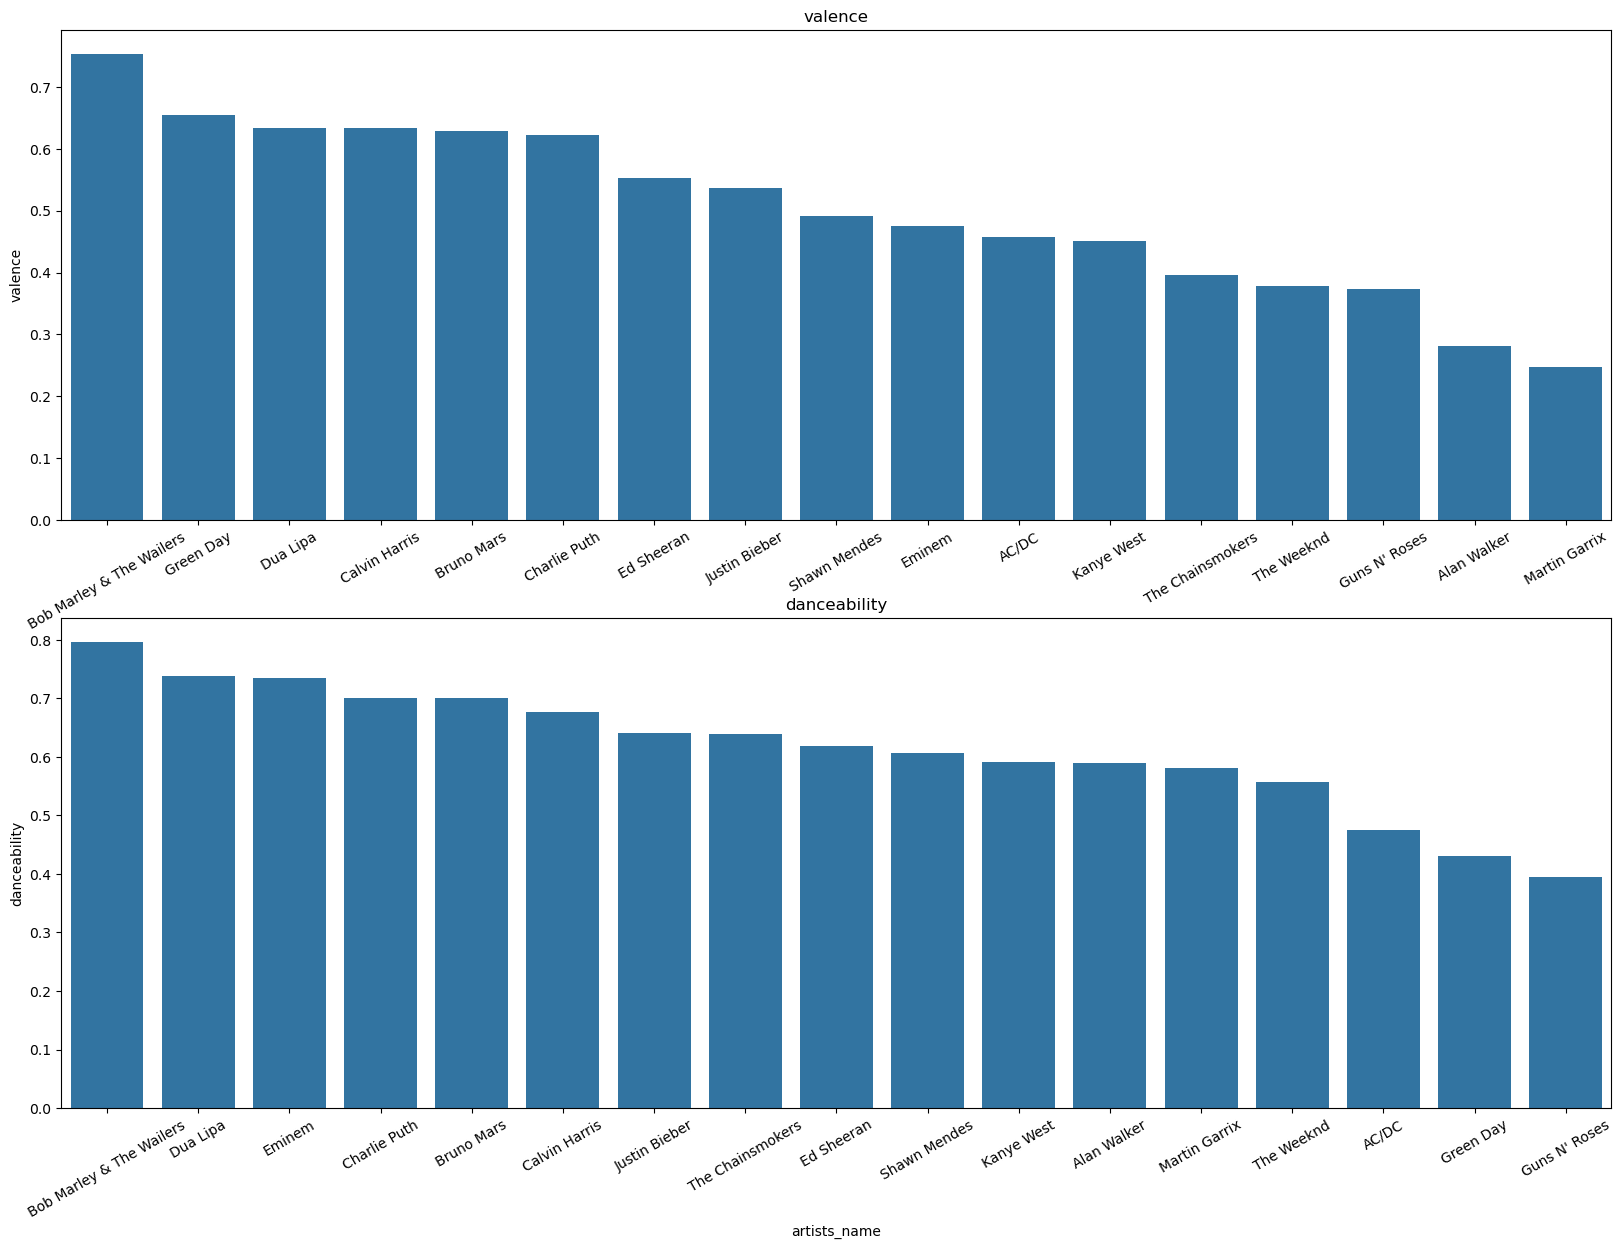

In [73]:
fig, ax = plt.subplots( figsize=[20,14],nrows=2)
feature = ['valence','danceability']

for i in range(len(feature)):
    index = clean_df.groupby(['artists_name'])[feature[i]].mean().sort_values(ascending=False).index
    plt.title(feature[i])
    s = sb.barplot(data=clean_df,x='artists_name',y=feature[i],color=base_color,ci=False,order=index,ax=ax[i]);
    s.set_xticklabels(s.get_xticklabels(), rotation=30)
    s.set_title(feature[i])
    

Here, we can see that the Bob Marley & The Willers have given the highest positive feeling songs to the listeners, then comes which is an American Rock Band. Dua Lipa,Calvin Harris,Bruno Mars, Charlie Puth have almost the same valence value.

Bob Marley and The Wallers in the danceability feature. We can observe a point here that all the rock bands have the lowest danceability.

#### 10) The artist/band which has the highest liveness songs.

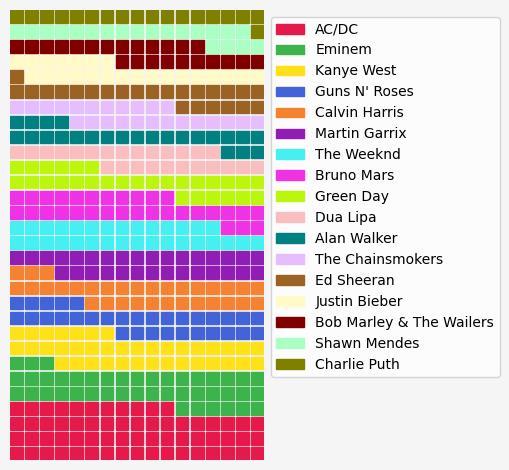

In [180]:
al_df = clean_df.sort_values(by='liveness').sort_values(by='liveness',ascending=False)
summ = sum(al_df.liveness)
category_proportions = [(float(value) / summ) for value in al_df.liveness]
category_proportions
tiles_per_category = [round(proportion * summ) for proportion in category_proportions]



value = {'AC/DC': 49,'Eminem': 34,'Kanye West': 30,"Guns N' Roses": 25,'Calvin Harris': 25,'Martin Garrix': 24,
'The Weeknd': 24,'Bruno Mars': 24,'Green Day': 23,'Dua Lipa': 20,'Alan Walker': 19,
'The Chainsmokers': 19,'Ed Sheeran': 19,'Justin Bieber': 18,'Bob Marley & The Wailers': 18,'Shawn Mendes': 16,
 'Charlie Puth': 14}

color = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
         '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
         '#bcf60c', '#fabebe', '#008080', '#e6beff', 
         '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000']

liss = list(al_df.groupby(['artists_name'])['liveness'].mean().sort_values(ascending=False).index)
liss
plt.figure(
    FigureClass = Waffle,
    rows = 30,
    columns = 17,
    values = value,
    colors = color,
    facecolor = 'whitesmoke',
 legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1),
          'labels':liss},
vertical=True)
plt.show() 

We can say the rapper artists and the rock bands have high liveness in their songs compared to the pop artists.ACDC has the highest liveness, then comes Eminem and Kanye.

#### 11) Relationship between year/month and popularity

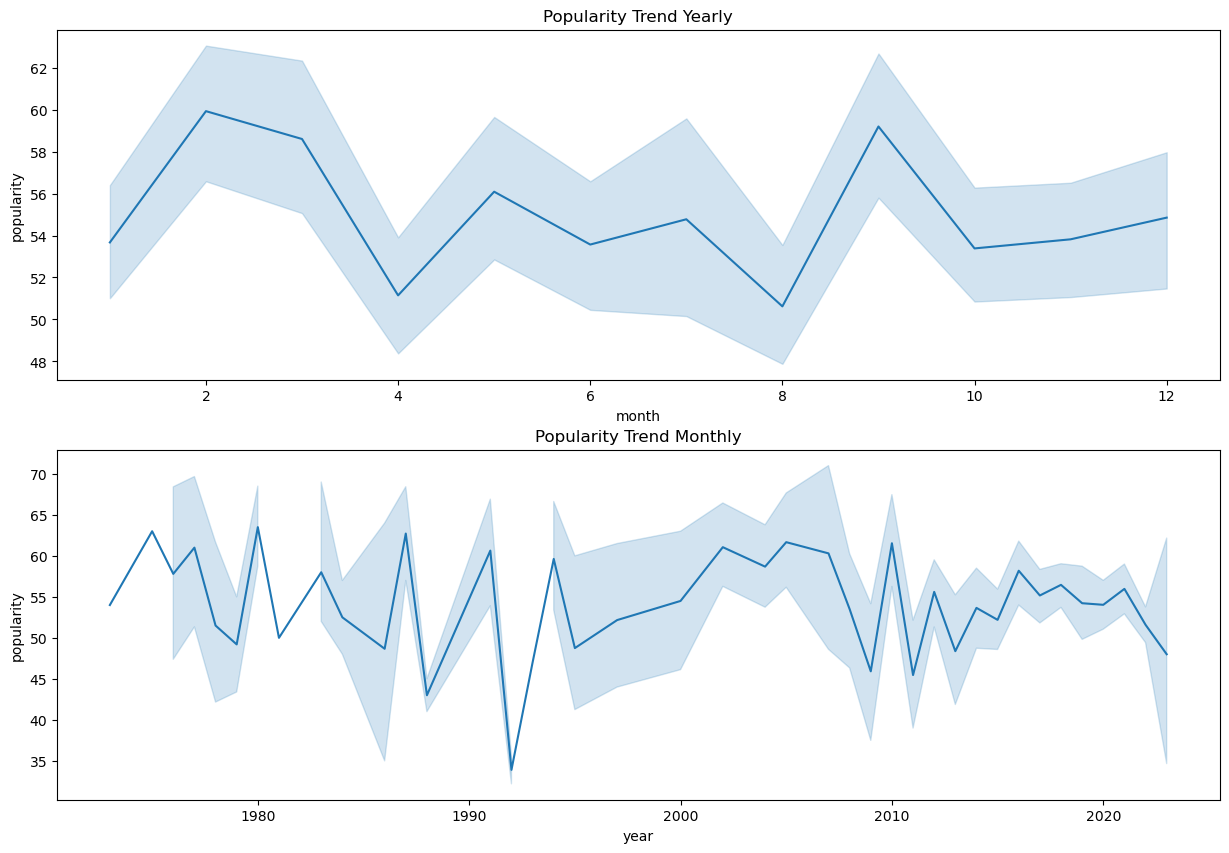

In [182]:
fig,axes = plt.subplots(figsize=[15,10],nrows = 2)
s1 = sb.lineplot(data = clean_df,y='popularity',x='month',ax=axes[0]).set(title='Popularity Trend Yearly');
s2 = sb.lineplot(data = clean_df,y='popularity',x='year',ax=axes[1]).set(title='Popularity Trend Monthly');

Observations that we can make by looking at these plots, 
- The months when the popularity is at the peak is in Feb and Sept.
- The popularity per year has been fluctuating a lot and is not consistent. The popularity started from 55 in the 1990s there was a sudden decrease in the popularity which recovered in the mid 1990s, after that the popularity started increasing gradually.
-  The reason why in the year 2023 the popularity is showing so low is our dataset the last release date was in the month of Feb 2023.

## Multivariate Exploration

#### Key and Mode with Popularity

<Figure size 1000x1000 with 0 Axes>

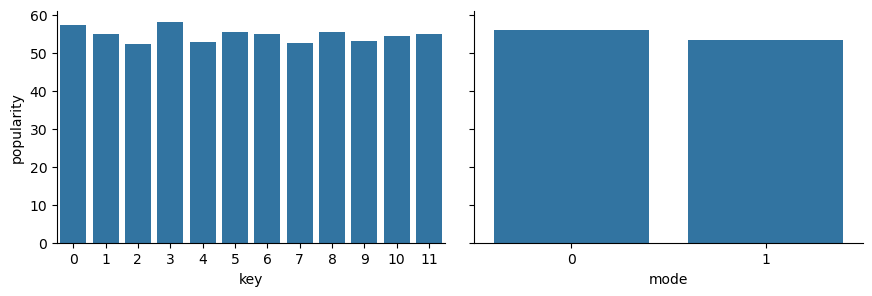

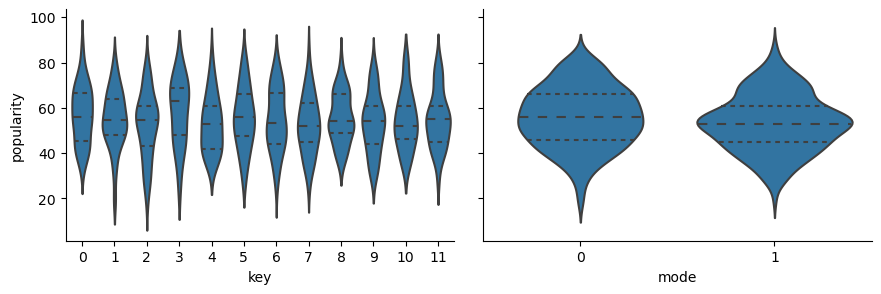

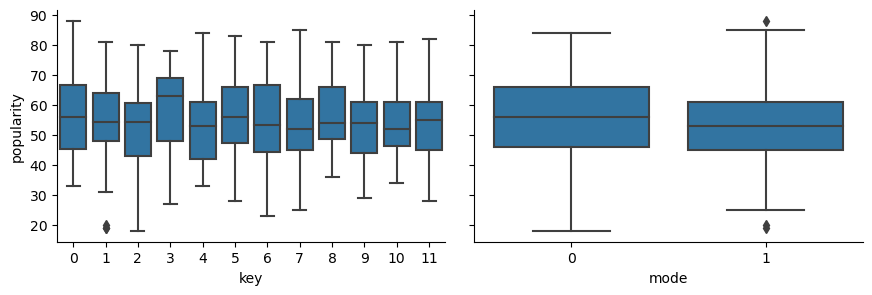

In [184]:
categoric_vars = ['key','mode']

plt.figure(figsize=[10,10])
g = sb.PairGrid(data = clean_df, y_vars = ['popularity'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(sb.barplot,color=base_color,ci=None)
g = sb.PairGrid(data = clean_df, y_vars = ['popularity'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(sb.violinplot,color=base_color,inner = 'quartile');
g = sb.PairGrid(data = clean_df, y_vars = ['popularity'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(sb.boxplot,color=base_color);

<b>Key Signature :</b> 
Key signature 3 distribution is left skewed (according to violin plot), majority songs are in the high popularity range, popularity range of songs in key 3 is between 60 to 80 but this key is used the least by the artists (according to the univariate analysis).

The safest Key Signature to use for making a popular song looks like the Key 0 which is the C scale as the average popularity of the songs played in this scale lies between 45 to 75.

<b>Mode:</b>
Mode 0 average popularity is more than Mode 1(according to barplot). Mode 1 has a low end as wella s high end outlier(according to boxplot).

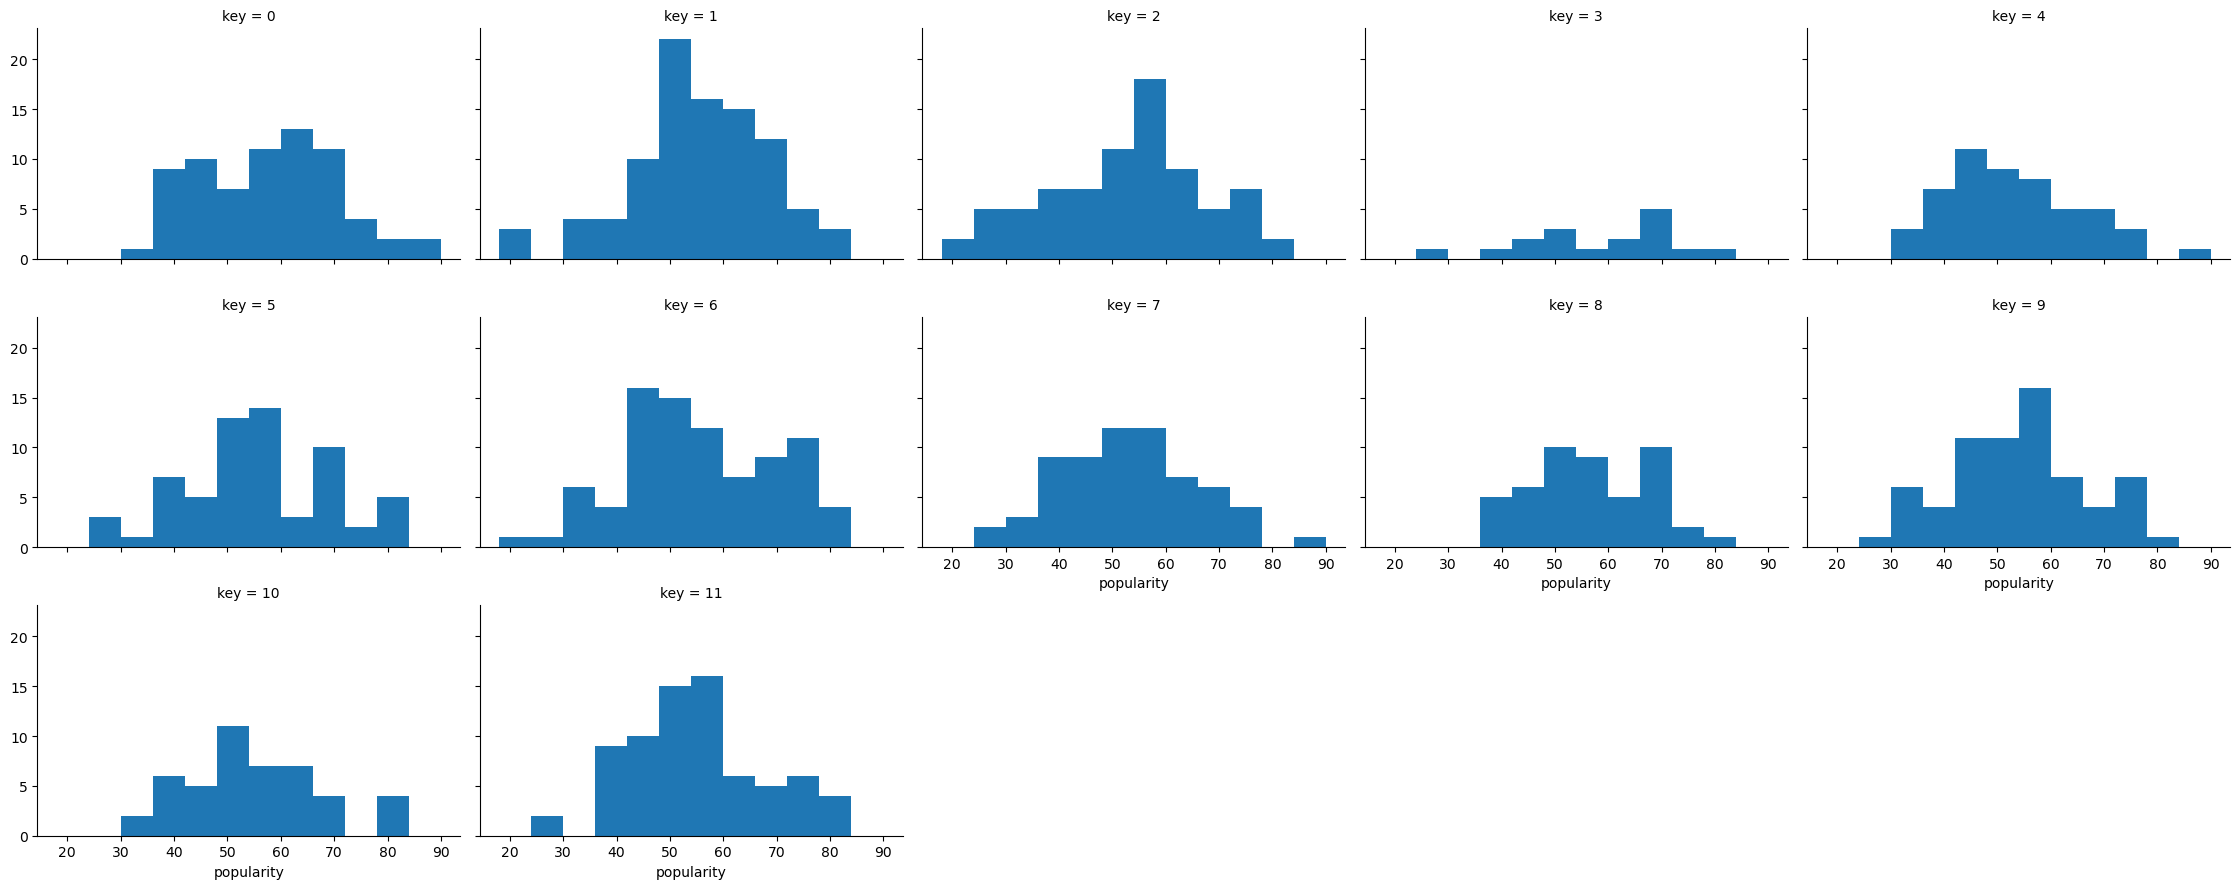

In [185]:
categoric_vars = ['key']
bins = np.arange(df.popularity.min(),df.popularity.max()+6,6)
g = sb.FacetGrid(data = clean_df, col = 'key',
                height = 3, aspect = 1.5,col_wrap=5)
g.map(plt.hist,'popularity',bins=bins);

- key 1 is roughly left skewed and also bimodal where one peak comes at 40-50 and the second peak comes at 60-70.
- <b>key 0 has no outliers and the popularity range is from 40 to 70, highest spike at 65. (This key is the safest key to use for aiming for a popular song).</b>
- As from the previous analysis we can see here that for key 3, the popularity lies above 40 and there are some high end outliers but the data points are really less.
- for <b>key 8 the distribution seems to be cut and the minimum popularity starts from 40, highest spike at 70, then reduces. (Good key for assuming a moderate to high popularity)</b>
- most of the other time signatures are roughly bell shape curve.

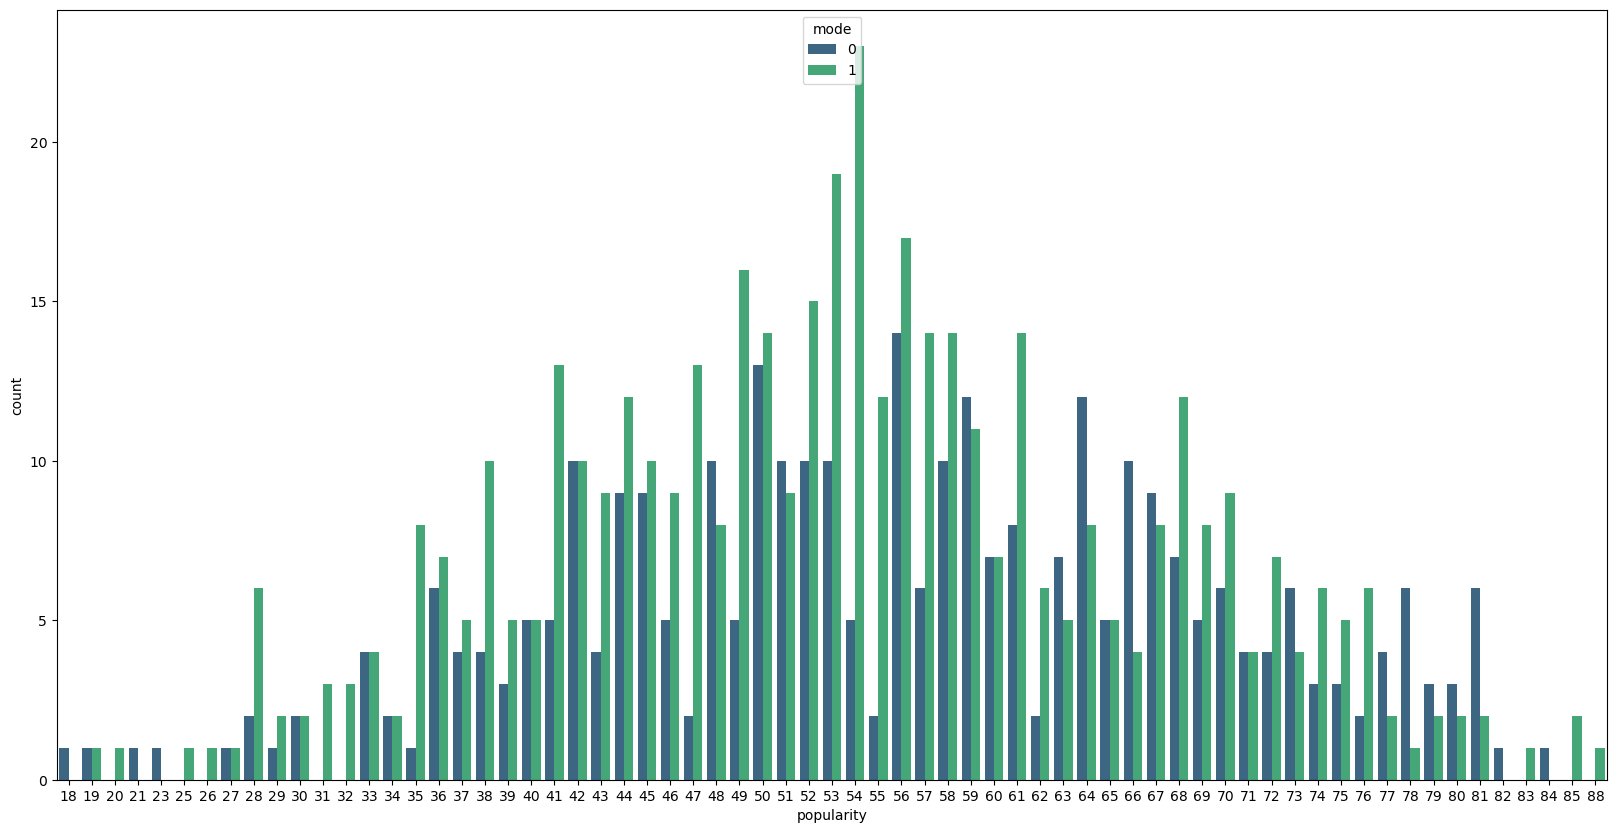

In [187]:
fig, ax = plt.subplots(figsize = (20,10))
sb.countplot(x = "popularity", data = clean_df, palette = "viridis",hue='mode'
            );

- Looking at the plot it looks like Mode 1 songs should have had higher popularity than Mode 0 but according to our prevoius analysis we saw that in average, Mode 0 has higher popularity than Mode 1. The reason could be that at the high end popularity (77 to 81) Mode 0's frequency is higher than Mode 1's.

## Summary and Conclusions

<p>
1) Energy and Loudness / Danceability and Valence :- <br>
    
- Majority of songs are <b>more in energy as well as loudness</b>.
- The majority songs have <b>loudness between -7.5 to -3.5 and the popularity range is from 45 to 75.</b> There are still some outliers present.
- Higher <b>dancable songs have higher valence</b>(more positive/happy feeling).
- <b>Bob Marley & The Willers have given the highest positive feeling songs</b> to the listeners, then comes which is an American Rock Band. Dua Lipa, Calvin Harris, Bruno Mars, and Charlie Puth have almost the same valence value.
- <b>Bob Marley and The Wallers have released quite danceable songs</b>. All the rock bands have the lowest danceability

2) Liveness :-<br>
- Majority of the songs are <b>less in liveness (0.05 to 0.2.) and more in energy</b>.
- Liveness is overall less in majority of songs, as our songs are more from album covers than live covers hence this was expected.
- The rapper artists and rock bands have high liveness in their songs compared to the pop artists.<b>ACDC has the highest liveness, then comes Eminem and Kanye (both are rappers).</b>

3) Popularity :-<br>
- The majority of songs fall in the range of 45 to 70.
- <b>"Doo-Wops & Hooligans" album by Bruno Mars has the highest popularity of 77</b>, second, comes "My Beautiful Dark Twisted Fantasy" by Kanye West and the third highest popular album is "Graduation" by Kanye West.
- <b>Kanye West and The Weeknd have the highest number of popular albums</b>, Second is Bruno Mars, and Third are Eminem and ED Sheeran, they have the same number of highly popular albums.
- The <b>most famous song is "Mocking Bird" by Eminem!! The popularity is 88</b> for this song.
- <b>Kanye West is the highest popular artist</b>, and Eminem/Weeknd/Dua Lipa are almost the same in popularity.

4) Album_type :-<br>
- That the <b>albumtype 'Album' has the highest count</b>. Then comes Singles,Deluxe and Compilation.
- <b>Interestingly the songs of "Single" album type are more popular than the songs of the "Album" album type</b>, but we also have to consider the error bars of these data points, the "Album" album_type data is concentrated and is signaling that the plotted average is more likely/reliable, compared to the "Single" album_type data. Album and Deluxe albums are almost equal in popularity. The compilation album has the lowest popularity.
- <b>The songs from a Deluxe album do give a positive boost to the popularity of a song if that song is near the 80 to 100 range popularity</b>, otherwise, the original album songs are higher in popularity than the Deluxe Album songs.


5) Releases_date, Year, Month :-<br>
- <b>According to per year we can observe an increasing trend of releases of songs</b>, as we have just started with the year 2023, we do not have many releases yet from the artists that I have chosen for my analysis. The <b>months when the highest number of songs have been released are October, November, June, April, and January.</b>
- The <b>months when the popularity is at its peak in Feb and Sept.</b>
- The <b>popularity per year</b> has been fluctuating a lot and is not consistent (<b>no particular trend</b>). The popularity started at 55 in the year 1973, there was a sudden decrease in the popularity at the start of the year 1990 but it recovered in the mid of the 1990s, after that the popularity started increasing gradually.

6) Key and Mode :-<br>

- <b>High number of songs were made in the key 1-2 (Csharp and D scale)</b>, moderate number of songs used the key 4 to 11 and 1 (E to B scale and C scale), key 3 (D#/Eflat scale) was used the least.
- Key 3 has the highest popularity but this key has been used the lowest number of times by the artists. <b>The safest Key Signature to use for making a popular song looks like the Key 0 and Key 8.</b>
- Songs in <b>Mode 0 have higher popularity than Mode 1 </b>but, the number of songs in Mode 1 is more than the number of songs in Mode 0.The reason could be that at the high end of the popularity scale (77 to 81) Mode 0's frequency is higher than Mode 1's.

7) Duration_m :-<br>
- The majority of songs have the <b>duration between 3 to 4.5 minutes.</b> 
- The low end outliers are either interlude or intro songs and the highest duration song(12.08 minutes long) is "Last Call" by Kanye West.

8) Tempo and Tempo_type :- <br>
- Artists have <b>used fast tempo more than moderate and slow</b>. Although, moderate and fast tempo do not have a huge gap. The least used tempo was "slow".

9) Time signature :-<br>
- <b>Time signature 4 has been extensively used by the artists</b>. Which is not shocking as 4/4 is the most commonly used time signature. The gap between the 4 and rest of the time signatures is significantly high.

</p>